In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

# 30th November dataset

In [2]:
df = pd.read_csv('data/20181128155507_FACTEUR_C - SEGMENT.csv', sep=';', encoding='ISO-8859-1')

In [3]:
df.head()

ETABLISSEMENT NOM_SEGMENT  \
0        GROUPE    FLIX 2-3   
1          TR21   21-P127-A   
2      TRANSARC    39-625-R   
3      TRANSARC    39-625-C   
4          TR21  21-TRAF-A1   

                                         LIEU_DEPART HEURE_DEPART  \
0  DIJON (21) - ARRET FLIXBUS - GARE SNCF - COUR ...        11:05   
1                    CURTIL ST SEINE (21) - ABRI BUS        08:20   
2  CLAIRVAUX LES LACS (39) - COLLEGE- 2 BIS RUE D...        16:45   
3  CLAIRVAUX LES LACS (39) - COLLEGE- 2 BIS RUE D...        12:05   
4     LONGEAULT (21) - DEPOT - 2 RUE GEORGES FEBVRET        13:32   

      LDEP_LATITUDE    LDEP_LONGITUDE  \
0         47,323534            5,0279   
1         47,449341          4,927155   
2  46,5742614982682  5,75548918518066   
3  46,5742614982682  5,75548918518066   
4          47,22115  5,25115708465576   

                                         LIEU_RETOUR HEURE_RETOUR  \
0                                  AIRE DES LOCHERES        12:00   
1  MESSIGNY VANTOUX (21) - ECOLE MATERNELLE - RUE...        08:45   
2                         LARGILLAY (39) - MARSONNAY        16:58   
3                         LARGILLAY (39) - MARSONNAY        12:21   
4                                        GENLIS (21)        13:38   

      LRET_LATITUDE    LRET_LONGITUDE  NB_PASSAGERS  LUNDI  MARDI  MERCREDI  \
0         47,309208           4,50138             0      1      1         1   
1          47,40366             5,018             0      1      1         0   
2  46,5536314953753   5,6613954284668             0      1      1         0   
3  46,5536314953753   5,6613954284668             0      0      0         1   
4  47,2402665454115  5,22239125396728             0      1      1         0   

   JEUDI  VENDREDI  
0      1         1  
1      1         1  
2      1         1  
3      0         0  
4      1         1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319 entries, 0 to 2318
Data columns (total 16 columns):
ETABLISSEMENT     2319 non-null object
NOM_SEGMENT       2319 non-null object
LIEU_DEPART       2319 non-null object
HEURE_DEPART      2319 non-null object
LDEP_LATITUDE     2319 non-null object
LDEP_LONGITUDE    2319 non-null object
LIEU_RETOUR       2319 non-null object
HEURE_RETOUR      2319 non-null object
LRET_LATITUDE     2318 non-null object
LRET_LONGITUDE    2318 non-null object
NB_PASSAGERS      2319 non-null int64
LUNDI             2319 non-null int64
MARDI             2319 non-null int64
MERCREDI          2319 non-null int64
JEUDI             2319 non-null int64
VENDREDI          2319 non-null int64
dtypes: int64(6), object(10)
memory usage: 290.0+ KB


In [5]:
nb = np.sum(df['NB_PASSAGERS'] != 0)
total = len(df)
print(f'Nombre de segments avec l\'info des passagers : {nb} ({nb/total:.1%})')

Nombre de segments avec l'info des passagers : 18 (0.8%)


In [6]:
nb = np.sum(len(df['NOM_SEGMENT'].unique()))
total = len(df)
print(f'Nombre de segments uniques : {nb} ({nb/total:.1%})')

Nombre de segments uniques : 2319 (100.0%)


In [7]:
print('Heures des départs')
sorted(df['HEURE_DEPART'].apply(lambda s: s.split(':')[0]).unique())

Heures des départs


['00',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23']

### <font color='red'>Des heures de retour dépassent 24</font>

In [8]:
print('Heures des arrivées')
sorted(df['HEURE_RETOUR'].apply(lambda s: s.split(':')[0]).unique())

Heures des arrivées


['01',
 '04',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '32',
 '33']

In [9]:
np.sum(df['HEURE_RETOUR'].apply(lambda s: int(s.split(':')[0])) > 24)

10

In [10]:
df.loc[df['HEURE_RETOUR'].apply(lambda s: int(s.split(':')[0])) > 24]

ETABLISSEMENT NOM_SEGMENT  \
43          GROUPE   FLIX 12-7   
44          GROUPE   FLIX 13-6   
849         GROUPE   FLIX760A1   
850         GROUPE   FLIX760A2   
851         GROUPE  FLIX760AB1   
852         GROUPE  FLIX760AB2   
1943        GROUPE   FLIX760R1   
1944        GROUPE   FLIX760R2   
1945        GROUPE  FLIX760RB1   
1946        GROUPE  FLIX760RB2   

                                            LIEU_DEPART HEURE_DEPART  \
43    DIJON (21) - ARRET FLIXBUS - GARE SNCF - COUR ...        23:45   
44    DIJON (21) - ARRET FLIXBUS - GARE SNCF - COUR ...        23:45   
849               BEAUNE (21) - SORTIE DE PEAGE 24.1 A6        21:25   
850               BEAUNE (21) - SORTIE DE PEAGE 24.1 A6        21:25   
851               BEAUNE (21) - SORTIE DE PEAGE 24.1 A6        21:25   
852               BEAUNE (21) - SORTIE DE PEAGE 24.1 A6        21:25   
1943                    AMSTERDAM - STATION SLOTERDIJCK        21:00   
1944                    AMSTERDAM - STATION SLOTERDIJCK        21:00   
1945                    AMSTERDAM - STATION SLOTERDIJCK        21:00   
1946                    AMSTERDAM - STATION SLOTERDIJCK        21:00   

         LDEP_LATITUDE   LDEP_LONGITUDE  \
43           47,323534           5,0279   
44           47,323534           5,0279   
849          47,003446         4,853474   
850          47,003446         4,853474   
851          47,003446         4,853474   
852          47,003446         4,853474   
1943  52,3896332198261  4,8400691217041   
1944  52,3896332198261  4,8400691217041   
1945  52,3896332198261  4,8400691217041   
1946  52,3896332198261  4,8400691217041   

                                           LIEU_RETOUR HEURE_RETOUR  \
43    LONS LE SAUNIER (39) - DEPOT - 190 RUE BERCAILLE        25:30   
44    LONS LE SAUNIER (39) - DEPOT - 190 RUE BERCAILLE        25:30   
849                    AMSTERDAM - STATION SLOTERDIJCK        33:00   
850                    AMSTERDAM - STATION SLOTERDIJCK        33:00   
851                    AMSTERDAM - STATION SLOTERDIJCK        33:00   
852                    AMSTERDAM - STATION SLOTERDIJCK        33:00   
1943             BEAUNE (21) - SORTIE DE PEAGE 24.1 A6        32:45   
1944             BEAUNE (21) - SORTIE DE PEAGE 24.1 A6        32:45   
1945             BEAUNE (21) - SORTIE DE PEAGE 24.1 A6        32:45   
1946             BEAUNE (21) - SORTIE DE PEAGE 24.1 A6        32:45   

         LRET_LATITUDE   LRET_LONGITUDE  NB_PASSAGERS  LUNDI  MARDI  MERCREDI  \
43            46,69309          5,55787             0      1      0         0   
44            46,69309          5,55787             0      0      1         0   
849   52,3896332198261  4,8400691217041             0      1      1         1   
850   52,3896332198261  4,8400691217041             0      1      1         1   
851   52,3896332198261  4,8400691217041             0      1      0         0   
852   52,3896332198261  4,8400691217041             0      1      0         0   
1943         47,003446         4,853474             0      1      1         1   
1944         47,003446         4,853474             0      1      1         1   
1945         47,003446         4,853474             0      1      1         0   
1946         47,003446         4,853474             0      1      1         0   

      JEUDI  VENDREDI  
43        0         1  
44        0         0  
849       1         1  
850       1         1  
851       0         1  
852       0         1  
1943      1         1  
1944      1         1  
1945      0         0  
1946      0         0

In [11]:
print('Minutes des départs')
mini = min(df['HEURE_DEPART'].apply(lambda s: int(s.split(':')[1])).unique())
maxi = max(df['HEURE_DEPART'].apply(lambda s: int(s.split(':')[1])).unique())
print(f'mini={mini}; maxi={maxi}')

Minutes des départs
mini=0; maxi=59


In [12]:
print('Minutes des retours')
mini = min(df['HEURE_RETOUR'].apply(lambda s: int(s.split(':')[1])).unique())
maxi = max(df['HEURE_RETOUR'].apply(lambda s: int(s.split(':')[1])).unique())
print(f'mini={mini}; maxi={maxi}')

Minutes des retours
mini=0; maxi=59


In [13]:
df_count = df.groupby(['LIEU_DEPART', 'LIEU_RETOUR', 'HEURE_DEPART', 'HEURE_RETOUR']).count()
df_count[df_count['ETABLISSEMENT'] > 1]

ETABLISSEMENT  \
LIEU_DEPART                                        LIEU_RETOUR                                        HEURE_DEPART HEURE_RETOUR                  
AAST (64)                                          SELESTAT (67) - GARE - 1 PLACE DE LA GARE          15:27        16:03                     2   
AIRE DU CHIEN BLANC                                DIJON (21) - ARRET FLIXBUS - GARE SNCF - COUR D... 17:15        18:00                     4   
ALTORF (67) - ROUTE DE STRASBOURG                  OBERNAI (67) - PARKING DES REMPARTS - RUE DE L'... 07:22        07:48                     2   
AMSTERDAM - STATION SLOTERDIJCK                    BEAUNE (21) - SORTIE DE PEAGE 24.1 A6              21:00        32:45                     4   
AUXERRE (89) - GARE ST GERVAIS - 6 RUE PAUL DOUMER AIRE DE VILLABÉ                                    20:15        21:15                     2   
                                                   AIRE DU CHIEN BLANC                                15:30        16:45                     5   
                                                   DIJON (21) - ARRET FLIXBUS - GARE SNCF - COUR D... 11:20        13:15                     2   
                                                                                                      22:05        23:45                     3   
                                                   PARIS (75) - QUAI DE BERCY                         09:30        12:15                     2   
                                                                                                      16:45        19:30                     3   
BARR (67) - CITE SCOLAIRE                          STOTZHEIM (67) - MAIRIE/ECOLE - 16 ROUTE ROMAINE   12:15        12:30                     2   
                                                                                                      17:15        17:30                     2   
BEAUNE (21) - COL JULES FERRY - BD JULES FERRY     BLIGNY LES BEAUNE (21) - LOT PAQUIER - 27 ROUTE... 17:15        17:53                     2   
BEAUNE (21) - SORTIE DE PEAGE 24.1 A6              AMSTERDAM - STATION SLOTERDIJCK                    21:25        33:00                     4   
                                                   DIJON (21) - ARRET FLIXBUS - GARE SNCF - COUR D... 21:30        22:00                     2   
CHAMPAGNOLE (39) - GARE                            LONS LE SAUNIER (39) - AVENUE DE LA MARSEILLAISE   08:00        08:40                     2   
                                                                                                      13:05        13:45                     2   
DIJON (21) - ARRET FLIXBUS - GARE SNCF - COUR D... AUXERRE (89) - GARE ST GERVAIS - 6 RUE PAUL DOUMER 07:00        09:00                     3   
                                                                                                      14:30        16:15                     3   
                                                                                                      18:00        20:00                     2   
                                                   LONS LE SAUNIER (39) - DEPOT - 190 RUE BERCAILLE   18:00        19:15                     2   
                                                                                                      23:45        25:30                     2   
GRENDELBRUCH (67) - BREHNACKER                     OBERNAI (67) - PARKING DES REMPARTS - RUE DE L'... 07:00        07:50                     2   
GRIESHEIM PRES MOLSHEIM (67) - MAL LECLERC         ROSHEIM (67) - COLLÈGE - 17 RUE DU STADE           07:40        07:50                     2   
JOIGNY (89) - GARE SNCF                            JOIGNY (89) - GARE SNCF                            17:00        17:45                     2   
LONS LE SAUNIER (39) - AVENUE DE LA MARSEILLAISE   CHAMPAGNOLE (39) - ECOLE J ARC - PL CAMILLE PROST  17:05        17:54                     2   
LONS LE SAUNIER (39) - DEPOT - 190 RUE BE

### <font color='red'>Des segments sont dédoublés</font>

In [14]:
df_count_days = df.groupby(['LIEU_DEPART', 'LIEU_RETOUR', 'HEURE_DEPART', 'HEURE_RETOUR', 'LUNDI', 'MARDI', 'MERCREDI', 'JEUDI', 'VENDREDI']).count()
df_count_days[df_count_days['ETABLISSEMENT'] > 1]

ETABLISSEMENT  \
LIEU_DEPART                                        LIEU_RETOUR                                        HEURE_DEPART HEURE_RETOUR LUNDI MARDI MERCREDI JEUDI VENDREDI                  
AMSTERDAM - STATION SLOTERDIJCK                    BEAUNE (21) - SORTIE DE PEAGE 24.1 A6              21:00        32:45        1     1     0        0     0                     2   
                                                                                                                                            1        1     1                     2   
AUXERRE (89) - GARE ST GERVAIS - 6 RUE PAUL DOUMER AIRE DU CHIEN BLANC                                15:30        16:45        0     0     1        0     0                     2   
BARR (67) - CITE SCOLAIRE                          STOTZHEIM (67) - MAIRIE/ECOLE - 16 ROUTE ROMAINE   12:15        12:30        0     0     1        0     0                     2   
                                                                                                      17:15        17:30        1     1     0        1     1                     2   
BEAUNE (21) - COL JULES FERRY - BD JULES FERRY     BLIGNY LES BEAUNE (21) - LOT PAQUIER - 27 ROUTE... 17:15        17:53        1     1     0        1     1                     2   
BEAUNE (21) - SORTIE DE PEAGE 24.1 A6              AMSTERDAM - STATION SLOTERDIJCK                    21:25        33:00        1     0     0        0     1                     2   
                                                                                                                                      1     1        1     1                     2   
                                                   DIJON (21) - ARRET FLIXBUS - GARE SNCF - COUR D... 21:30        22:00        1     1     0        0     0                     2   
CHAMPAGNOLE (39) - GARE                            LONS LE SAUNIER (39) - AVENUE DE LA MARSEILLAISE   13:05        13:45        1     1     1        1     1                     2   
GRIESHEIM PRES MOLSHEIM (67) - MAL LECLERC         ROSHEIM (67) - COLLÈGE - 17 RUE DU STADE           07:40        07:50        1     1     1        1     1                     2   
LONS LE SAUNIER (39) - AVENUE DE LA MARSEILLAISE   CHAMPAGNOLE (39) - ECOLE J ARC - PL CAMILLE PROST  17:05        17:54        1     1     1        1     1                     2   
LONS LE SAUNIER (39) - LYCEE MONTCIEL - 1 AV DE... LONS LE SAUNIER (39) - LYCEE CORBUSIER             18:00        18:15        1     1     0        1     0                     2   
PARIS (75) - QUAI DE BERCY                         AUXERRE (89) - GARE ST GERVAIS - 6 RUE PAUL DOUMER 10:55        13:05        0     0     0        0     0                     2   
PERREUX (42) - LYCÉE CHERVÉ - RUE DE CHERVE        ROANNE (42) - GARE ROUTIERE - RUE PIERRE SEMARD    11:50        12:10        0     0     1        0     0                     2   
                                                                                                      17:30        17:50        1     1     0        1     1                     2   
ROANNE (42) - GARE ROUTIERE - RUE PIERRE SEMARD    PERREUX (42) - LYCÉE CHERVÉ - RUE DE CHERVE        07:45        08:05        1     1     1        1     1                     2   
SAINT DIE DES VOSGES (88) - GARE SNCF - 13 RUE ... SELESTAT (67) - GARE - 1 PLACE DE LA GARE          09:58        11:03        0     0     0        0     0                     2   
                                                                                                      11:58        13:03        0     0     0        0     0                     2   
                                                                                                      13:58        15:03        1     1     1        1     1                     2   
                                                                                                      15:58        17:03        0     0     0        0     0     

In [15]:
len(df_count_days[df_count_days['ETABLISSEMENT'] > 1])

37

### <font color='red'>Des segments ne s'appliquent pas la semaine</font>

In [16]:
df.groupby(['LUNDI', 'MARDI', 'MERCREDI', 'JEUDI', 'VENDREDI']).count()

ETABLISSEMENT  NOM_SEGMENT  LIEU_DEPART  \
LUNDI MARDI MERCREDI JEUDI VENDREDI                                            
0     0     0        0     0                    99           99           99   
                           1                    62           62           62   
                     1     0                    14           14           14   
                           1                     3            3            3   
            1        0     0                   427          427          427   
                           1                     4            4            4   
                     1     0                     5            5            5   
      1     0        0     0                     9            9            9   
                           1                     1            1            1   
                     1     0                     1            1            1   
                           1                     1            1            1   
            1        1     1                    14           14           14   
1     0     0        0     0                    27           27           27   
                           1                     9            9            9   
                     1     1                     3            3            3   
      1     0        0     0                    10           10           10   
                           1                     3            3            3   
                     1     0                    31           31           31   
                           1                   981          981          981   
            1        1     0                     9            9            9   
                           1                   606          606          606   

                                     HEURE_DEPART  LDEP_LATITUDE  \
LUNDI MARDI MERCREDI JEUDI VENDREDI                                
0     0     0        0     0                   99             99   
                           1                   62             62   
                     1     0                   14             14   
                           1                    3              3   
            1        0     0                  427            427   
                           1                    4              4   
                     1     0                    5              5   
      1     0        0     0                    9              9   
                           1                    1              1   
                     1     0                    1              1   
                           1                    1              1   
            1        1     1                   14             14   
1     0     0        0     0                   27             27   
                           1                    9              9   
                     1     1                    3              3   
      1     0        0     0                   10             10   
                           1                    3              3   
                     1     0                   31             31   
                           1                  981            981   
            1        1     0                    9              9   
                           1                  606            606   

                                     LDEP_LONGITUDE  LIEU_RETOUR  \
LUNDI MARDI MERCREDI JEUDI VENDREDI                                
0     0     0        0     0                     99           99   
                           1                     62           62   
                     1     0                     14           14   
                           1                      3            3   
            1        0     0                    427          427   
                           1                      4            4   
                     1     0                      5            5   
      1     0      

In [17]:
len(df.groupby(['LUNDI', 'MARDI', 'MERCREDI', 'JEUDI', 'VENDREDI']).count())

21

In [18]:
(981 + 427 + 606)/len(df)

0.8684777921517896

In [19]:
df[(df['LUNDI'] == 0) & (df['MARDI'] == 0) & (df['MERCREDI'] == 0) & (df['JEUDI'] == 0) & (df['VENDREDI'] == 0)]

ETABLISSEMENT NOM_SEGMENT  \
156     TR BASTIEN    67-383-3   
159     TR BASTIEN    67-382-5   
198     TR BASTIEN    67-370-4   
239     TR BASTIEN   67-377-11   
558        MARCHAL  MOBI_31532   
576        MARCHAL  MOBI_31700   
577        MARCHAL  MOBI_31702   
581        MARCHAL  MOBI_31699   
586        MARCHAL  MOBI_31537   
588        MARCHAL  MOBI_31539   
604           TR25    TER33659   
766     TR BASTIEN    67-372-6   
783     TR BASTIEN    67-372-8   
825     TR BASTIEN   67-377-12   
888      TR BALIAN  89-LM852-R   
1100        GROUPE    TER30472   
1102        GROUPE  TER30458/2   
1104        GROUPE  TER30446/2   
1105        GROUPE  TER30452/1   
1106        GROUPE  TER30448/1   
1289    TR BASTIEN    67-385-6   
1518      TRANSARC  39-315-A47   
1602     TR BALIAN  89-LM852-A   
1603     TR BALIAN  89-LR809-5   
1918    TR BASTIEN    67-377-4   
1919    TR BASTIEN    67-372-7   
1922    TR BASTIEN    67-372-1   
1924    TR BASTIEN    67-377-3   
1925    TR BASTIEN    67-370-3   
1932       AQUILON   42-M209-R   
...            ...         ...   
2175        GROUPE  TER30448/2   
2204        GROUPE    TER30469   
2205        GROUPE    TER30479   
2208        GROUPE    TER30475   
2217        GROUPE  TER30459/2   
2219        GROUPE  TER30471/2   
2220        GROUPE  TER30475/2   
2221        GROUPE  TER30481/2   
2222        GROUPE  TER30487/2   
2223        GROUPE  TER30491/2   
2224        GROUPE  TER30485/2   
2225        GROUPE    TER30495   
2226        GROUPE  TER30495/2   
2231        GROUPE  TER30439/2   
2232        GROUPE  TER30447/2   
2233        GROUPE  TER30451/2   
2234        GROUPE  TER30455/2   
2235        GROUPE  TER30461/3   
2238        GROUPE  TER30469/2   
2239        GROUPE  TER30473/2   
2240        GROUPE  TER30479/2   
2241        GROUPE  TER30483/2   
2250        GROUPE    TER30473   
2253        GROUPE  TER30445/2   
2254        GROUPE  TER30467/2   
2255        GROUPE  TER30443/2   
2259            TT  TER30427/2   
2260        GROUPE  TER30449/2   
2261        GROUPE  TER30453/2   
2262        GROUPE    TER30477   

                                            LIEU_DEPART HEURE_DEPART  \
156   DAMBACH LA VILLE (67) - GARE - 4 PLACE DE LA GARE        07:12   
159    STOTZHEIM (67) - MAIRIE/ECOLE - 16 ROUTE ROMAINE        07:30   
198   OBERNAI (67) - PARKING DES REMPARTS - RUE DE L...        12:15   
239   OBERNAI (67) - PARKING DES REMPARTS - RUE DE L...        12:15   
558               CHAGNY (71) - GARE - PLACE DE LA GARE        15:25   
576    LE CREUSOT (71) - GARE - 1241 AVENUE DE L'EUROPE        06:55   
577    LE CREUSOT (71) - GARE - 1241 AVENUE DE L'EUROPE        17:26   
581   ETANG SUR ARROUX (71) - GARE - RUE DU 19 MARS ...        19:51   
586      AUTUN (71) - GARE - 18 AVENUE DE LA REPUBLIQUE        13:30   
588      AUTUN (71) - GARE - 18 AVENUE DE LA REPUBLIQUE        17:30   
604   BESANCON (25) - GARE VIOTTE - 2 AVENUE DE LA PAIX        23:05   
766   OBERNAI (67) - PARKING DES REMPARTS - RUE DE L...        12:18   
783   OBERNAI (67) - LYCEE AGRICOLE - 44 BD DE L'EUROPE        12:15   
825   OBERNAI (67) - PARKING DES REMPARTS - RUE DE L...        12:15   
888                     TOUCY (89) - PLACE FRERES GENET        11:20   
1100          SELESTAT (67) - GARE - 1 PLACE DE LA GARE        07:22   
1102          SELESTAT (67) - GARE - 1 PLACE DE LA GARE        17:22   
1104          SELESTAT (67) - GARE - 1 PLACE DE LA GARE        13:22   
1105          SELESTAT (67) - GARE - 1 PLACE DE LA GARE        16:22   
1106          SELESTAT (67) - GARE - 1 PLACE DE LA GARE        14:22   
1289                          BARR (67) - CITE SCOLAIRE        12:10   
1518                            CHAMPAGNOLE (39) - GARE        08:00   
1602                    AILLANT SUR THOLON (89) - PLACE        08:30   
1603    AUXERRE (89) GARE ROUTIERE -  RUE DES MIGRAINES        17:25   
1918                        ROSENWILLER (67) - CALVAIRE        07:15   
1919                  AL

# 6th December dataset

In [2]:
df = pd.read_csv('data/facteurc_segments.csv', sep=';', encoding='ISO-8859-1')

In [3]:
df.head()

ETABLISSEMENT    SEGMENT         DEPART_HEURE  \
0     TR BALIAN   89-050-A  30/12/1899 07:20:00   
1     TR BALIAN  89-STJ2-A  30/12/1899 07:10:00   
2     TR BALIAN   89-246-A  30/12/1899 07:10:00   
3     TR BALIAN   89-025-R  30/12/1899 17:53:00   
4     TR BALIAN   89-025-C  30/12/1899 13:03:00   

                          DEPART_LIEU            FIN_HEURE  \
0               CHARMOY (89) - MAIRIE  30/12/1899 07:45:00   
1                         ARMEAU (89)  30/12/1899 07:55:00   
2            EGLENY (89) - CHAUCHOINE  30/12/1899 08:00:00   
3  ARMEAU (89) - 1 PLACE DE LA MAIRIE  30/12/1899 18:23:00   
4  ARMEAU (89) - 1 PLACE DE LA MAIRIE  30/12/1899 13:33:00   

                                            FIN_LIEU      LUNDI      MARDI  \
0            MIGENNES (89) - COLLEGE JACQUES PREVERT  JOIGNY 16  JOIGNY 16   
1  JOIGNY (89) - COLLEGE SAINT JACQUES - 6 FBG ST...  JOIGNY 09  JOIGNY 09   
2           TOUCY (89) - LYCEE - 6 RUE DES MONTAGNES  BALIAN 04  BALIAN 04   
3                    LES BORDES (89) - LE CLOS AUBRY  JOIGNY 09  JOIGNY 09   
4                    LES BORDES (89) - LE CLOS AUBRY        NaN        NaN   

    MERCREDI      JEUDI   VENDREDI DEPART_LATITUDE  DEPART_LONGITUDE  \
0  JOIGNY 16  JOIGNY 16  JOIGNY 16       47,941524  3,49103076923077   
1  JOIGNY 09  JOIGNY 09  JOIGNY 09         48,0467          3,319537   
2  BALIAN 04  BALIAN 04  BALIAN 04   47,8137588195       3,387198746   
3        NaN  JOIGNY 09  JOIGNY 09        48,04467          3,322392   
4  JOIGNY 09        NaN        NaN        48,04467          3,322392   

       FIN_LATITUDE     FIN_LONGITUDE  
0          47,96925          3,504756  
1  47,9833725495832  3,38901416931152  
2          47,73839  3,29567416931152  
3         48,100829          3,406252  
4         48,100829          3,406252

In [4]:
nb = np.sum(len(df['SEGMENT'].unique()))
total = len(df)
print(f'Nombre de segments uniques : {nb} ({nb/total:.1%})')

Nombre de segments uniques : 208 (100.0%)


In [5]:
df['RUN_LUNDI'] = ~pd.isnull(df['LUNDI'])
df['RUN_MARDI'] = ~pd.isnull(df['MARDI'])
df['RUN_MERCREDI'] = ~pd.isnull(df['MERCREDI'])
df['RUN_JEUDI'] = ~pd.isnull(df['JEUDI'])
df['RUN_VENDREDI'] = ~pd.isnull(df['VENDREDI'])

In [6]:
df.head()

ETABLISSEMENT    SEGMENT         DEPART_HEURE  \
0     TR BALIAN   89-050-A  30/12/1899 07:20:00   
1     TR BALIAN  89-STJ2-A  30/12/1899 07:10:00   
2     TR BALIAN   89-246-A  30/12/1899 07:10:00   
3     TR BALIAN   89-025-R  30/12/1899 17:53:00   
4     TR BALIAN   89-025-C  30/12/1899 13:03:00   

                          DEPART_LIEU            FIN_HEURE  \
0               CHARMOY (89) - MAIRIE  30/12/1899 07:45:00   
1                         ARMEAU (89)  30/12/1899 07:55:00   
2            EGLENY (89) - CHAUCHOINE  30/12/1899 08:00:00   
3  ARMEAU (89) - 1 PLACE DE LA MAIRIE  30/12/1899 18:23:00   
4  ARMEAU (89) - 1 PLACE DE LA MAIRIE  30/12/1899 13:33:00   

                                            FIN_LIEU      LUNDI      MARDI  \
0            MIGENNES (89) - COLLEGE JACQUES PREVERT  JOIGNY 16  JOIGNY 16   
1  JOIGNY (89) - COLLEGE SAINT JACQUES - 6 FBG ST...  JOIGNY 09  JOIGNY 09   
2           TOUCY (89) - LYCEE - 6 RUE DES MONTAGNES  BALIAN 04  BALIAN 04   
3                    LES BORDES (89) - LE CLOS AUBRY  JOIGNY 09  JOIGNY 09   
4                    LES BORDES (89) - LE CLOS AUBRY        NaN        NaN   

    MERCREDI      JEUDI   VENDREDI DEPART_LATITUDE  DEPART_LONGITUDE  \
0  JOIGNY 16  JOIGNY 16  JOIGNY 16       47,941524  3,49103076923077   
1  JOIGNY 09  JOIGNY 09  JOIGNY 09         48,0467          3,319537   
2  BALIAN 04  BALIAN 04  BALIAN 04   47,8137588195       3,387198746   
3        NaN  JOIGNY 09  JOIGNY 09        48,04467          3,322392   
4  JOIGNY 09        NaN        NaN        48,04467          3,322392   

       FIN_LATITUDE     FIN_LONGITUDE  RUN_LUNDI  RUN_MARDI  RUN_MERCREDI  \
0          47,96925          3,504756       True       True          True   
1  47,9833725495832  3,38901416931152       True       True          True   
2          47,73839  3,29567416931152       True       True          True   
3         48,100829          3,406252       True       True         False   
4         48,100829          3,406252      False      False          True   

   RUN_JEUDI  RUN_VENDREDI  
0       True          True  
1       True          True  
2       True          True  
3       True          True  
4      False         False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 20 columns):
ETABLISSEMENT       208 non-null object
SEGMENT             208 non-null object
DEPART_HEURE        208 non-null object
DEPART_LIEU         208 non-null object
FIN_HEURE           208 non-null object
FIN_LIEU            208 non-null object
LUNDI               155 non-null object
MARDI               154 non-null object
MERCREDI            101 non-null object
JEUDI               154 non-null object
VENDREDI            155 non-null object
DEPART_LATITUDE     208 non-null object
DEPART_LONGITUDE    208 non-null object
FIN_LATITUDE        208 non-null object
FIN_LONGITUDE       208 non-null object
RUN_LUNDI           208 non-null bool
RUN_MARDI           208 non-null bool
RUN_MERCREDI        208 non-null bool
RUN_JEUDI           208 non-null bool
RUN_VENDREDI        208 non-null bool
dtypes: bool(5), object(15)
memory usage: 25.5+ KB


In [8]:
df['DEPART_LATITUDE'] = df['DEPART_LATITUDE'].str.replace(',', '.').astype(float)
df['DEPART_LONGITUDE'] = df['DEPART_LONGITUDE'].str.replace(',', '.').astype(float)
df['FIN_LATITUDE'] = df['FIN_LATITUDE'].str.replace(',', '.').astype(float)
df['FIN_LONGITUDE'] = df['FIN_LONGITUDE'].str.replace(',', '.').astype(float)

In [11]:
df['DEPART_HEURE'].head()

0    30/12/1899 07:20:00
1    30/12/1899 07:10:00
2    30/12/1899 07:10:00
3    30/12/1899 17:53:00
4    30/12/1899 13:03:00
Name: DEPART_HEURE, dtype: object

In [12]:
pd.to_datetime(df['DEPART_HEURE']).dt.hour.head()

0     7
1     7
2     7
3    17
4    13
Name: DEPART_HEURE, dtype: int64

In [14]:
pd.to_datetime(df['DEPART_HEURE']).dt.minute.head()

0    20
1    10
2    10
3    53
4     3
Name: DEPART_HEURE, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 20 columns):
ETABLISSEMENT       208 non-null object
SEGMENT             208 non-null object
DEPART_HEURE        208 non-null object
DEPART_LIEU         208 non-null object
FIN_HEURE           208 non-null object
FIN_LIEU            208 non-null object
LUNDI               155 non-null object
MARDI               154 non-null object
MERCREDI            101 non-null object
JEUDI               154 non-null object
VENDREDI            155 non-null object
DEPART_LATITUDE     208 non-null float64
DEPART_LONGITUDE    208 non-null float64
FIN_LATITUDE        208 non-null float64
FIN_LONGITUDE       208 non-null float64
RUN_LUNDI           208 non-null bool
RUN_MARDI           208 non-null bool
RUN_MERCREDI        208 non-null bool
RUN_JEUDI           208 non-null bool
RUN_VENDREDI        208 non-null bool
dtypes: bool(5), float64(4), object(11)
memory usage: 25.5+ KB


In [27]:
df.groupby(['RUN_LUNDI', 'RUN_MARDI', 'RUN_MERCREDI', 'RUN_JEUDI', 'RUN_VENDREDI']).count()

ETABLISSEMENT  \
RUN_LUNDI RUN_MARDI RUN_MERCREDI RUN_JEUDI RUN_VENDREDI                  
False     False     False        False     False                     5   
                    True         False     False                    47   
          True      True         True      False                     1   
True      False     False        False     True                      2   
          True      False        True      True                    100   
                    True         True      True                     53   

                                                         SEGMENT  \
RUN_LUNDI RUN_MARDI RUN_MERCREDI RUN_JEUDI RUN_VENDREDI            
False     False     False        False     False               5   
                    True         False     False              47   
          True      True         True      False               1   
True      False     False        False     True                2   
          True      False        True      True              100   
                    True         True      True               53   

                                                         DEPART_HEURE  \
RUN_LUNDI RUN_MARDI RUN_MERCREDI RUN_JEUDI RUN_VENDREDI                 
False     False     False        False     False                    5   
                    True         False     False                   47   
          True      True         True      False                    1   
True      False     False        False     True                     2   
          True      False        True      True                   100   
                    True         True      True                    53   

                                                         DEPART_LIEU  \
RUN_LUNDI RUN_MARDI RUN_MERCREDI RUN_JEUDI RUN_VENDREDI                
False     False     False        False     False                   5   
                    True         False     False                  47   
          True      True         True      False                   1   
True      False     False        False     True                    2   
          True      False        True      True                  100   
                    True         True      True                   53   

                                                         FIN_HEURE  FIN_LIEU  \
RUN_LUNDI RUN_MARDI RUN_MERCREDI RUN_JEUDI RUN_VENDREDI                        
False     False     False        False     False                 5         5   
                    True         False     False                47        47   
          True      True         True      False                 1         1   
True      False     False        False     True                  2         2   
          True      False        True      True                100       100   
                    True         True      True                 53        53   

                                                         LUNDI  MARDI  \
RUN_LUNDI RUN_MARDI RUN_MERCREDI RUN_JEUDI RUN_VENDREDI                 
False     False     False        False     False             0      0   
                    True         False     False             0      0   
          True      True         True      False             0      1   
True      False     False        False     True              2      0   
          True      False        True      True            100    100   
                    True         True      True             53     53   

                                                         MERCREDI  JEUDI  \
RUN_LUNDI RUN_MARDI RUN_MERCREDI RUN_JEUDI RUN_VENDREDI                    
False     False     False        False     False                0      0   
                    True         False     False               47      0   
          True      True         True      False                1      1   
True      False     False        False     True                 0      0   
          True      False        True      True                 0    100   

In [28]:
(100 + 53 + 47)/len(df)

0.9615384615384616

In [29]:
df[(~ df['RUN_LUNDI']) & (~ df['RUN_MARDI']) & (~ df['RUN_MERCREDI']) & (~ df['RUN_JEUDI']) & (~ df['RUN_VENDREDI'])]

ETABLISSEMENT     SEGMENT         DEPART_HEURE  \
60      TR BALIAN  89-016NAV2  30/12/1899 17:10:00   
147     TR BALIAN  89-KOE2V-R  30/12/1899 13:40:00   
180     TR BALIAN   89-IME9-R  30/12/1899 13:50:00   
182     TR BALIAN   89-IME7-R  30/12/1899 14:00:00   
193     TR BALIAN  89-MEZA2-V  30/12/1899 12:00:00   

                                           DEPART_LIEU            FIN_HEURE  \
60   JOIGNY (89) - COLLEGE SAINT JACQUES - 6 FBG ST...  30/12/1899 17:20:00   
147              MONETEAU (89) - SAJA 16 RUE DES ISLES  30/12/1899 14:40:00   
180   SAINT JULIEN DU SAULT (89) - IME LES FONTENOTTES  30/12/1899 16:10:00   
182   SAINT JULIEN DU SAULT (89) - IME LES FONTENOTTES  30/12/1899 15:45:00   
193                               MEZILLES (89) - ESAT  30/12/1899 12:45:00   

                                              FIN_LIEU LUNDI MARDI MERCREDI  \
60   JOIGNY (89) - LYCEE DAVIER - PKG 19 - AVENUE P...   NaN   NaN      NaN   
147                    JOIGNY (89) - 6 RUE VICTOR HUGO   NaN   NaN      NaN   
180   SAINT JULIEN DU SAULT (89) - IME LES FONTENOTTES   NaN   NaN      NaN   
182                     JOIGNY (89) - PARKING DU LYCEE   NaN   NaN      NaN   
193          AUXERRE (89) - PLACE DE LA GARE ST AMATRE   NaN   NaN      NaN   

    JEUDI VENDREDI  DEPART_LATITUDE  DEPART_LONGITUDE  FIN_LATITUDE  \
60    NaN      NaN        47.983373          3.389014     47.981500   
147   NaN      NaN        47.830064          3.576736     47.979838   
180   NaN      NaN        48.030886          3.294206     48.030886   
182   NaN      NaN        48.030886          3.294206     47.982755   
193   NaN      NaN        47.703410          3.165229     47.787070   

     FIN_LONGITUDE  RUN_LUNDI  RUN_MARDI  RUN_MERCREDI  RUN_JEUDI  \
60        3.419894      False      False         False      False   
147       3.413675      False      False         False      False   
180       3.294206      False      False         False      False   
182       3.418086      False      False         False      False   
193       3.563048      False      False         False      False   

     RUN_VENDREDI  
60          False  
147         False  
180         False  
182         False  
193         False

### Segment map

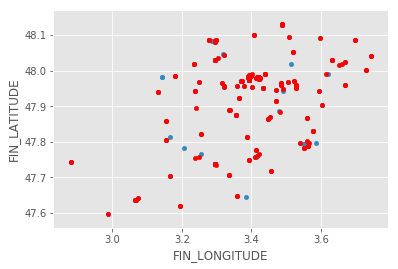

In [31]:
ax = df.plot.scatter('DEPART_LONGITUDE', 'DEPART_LATITUDE')
df.plot.scatter('FIN_LONGITUDE', 'FIN_LATITUDE', color='r', ax=ax)

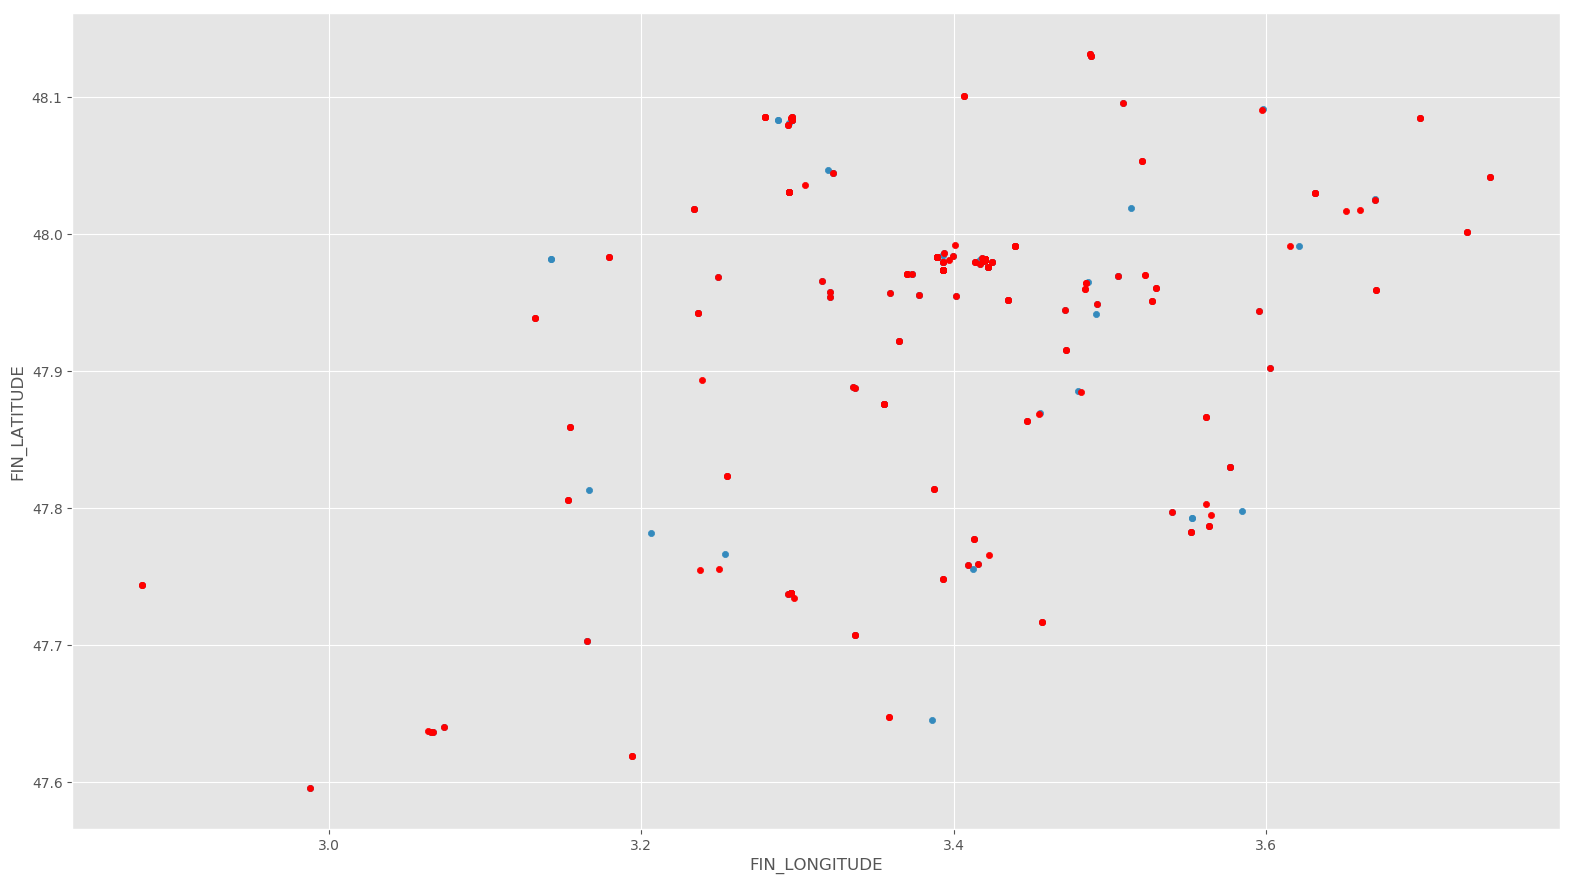

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(19.2, 10.8), dpi=100, sharex=True)
df.plot.scatter('DEPART_LONGITUDE', 'DEPART_LATITUDE', ax=ax)
df.plot.scatter('FIN_LONGITUDE', 'FIN_LATITUDE', color='r', ax=ax)

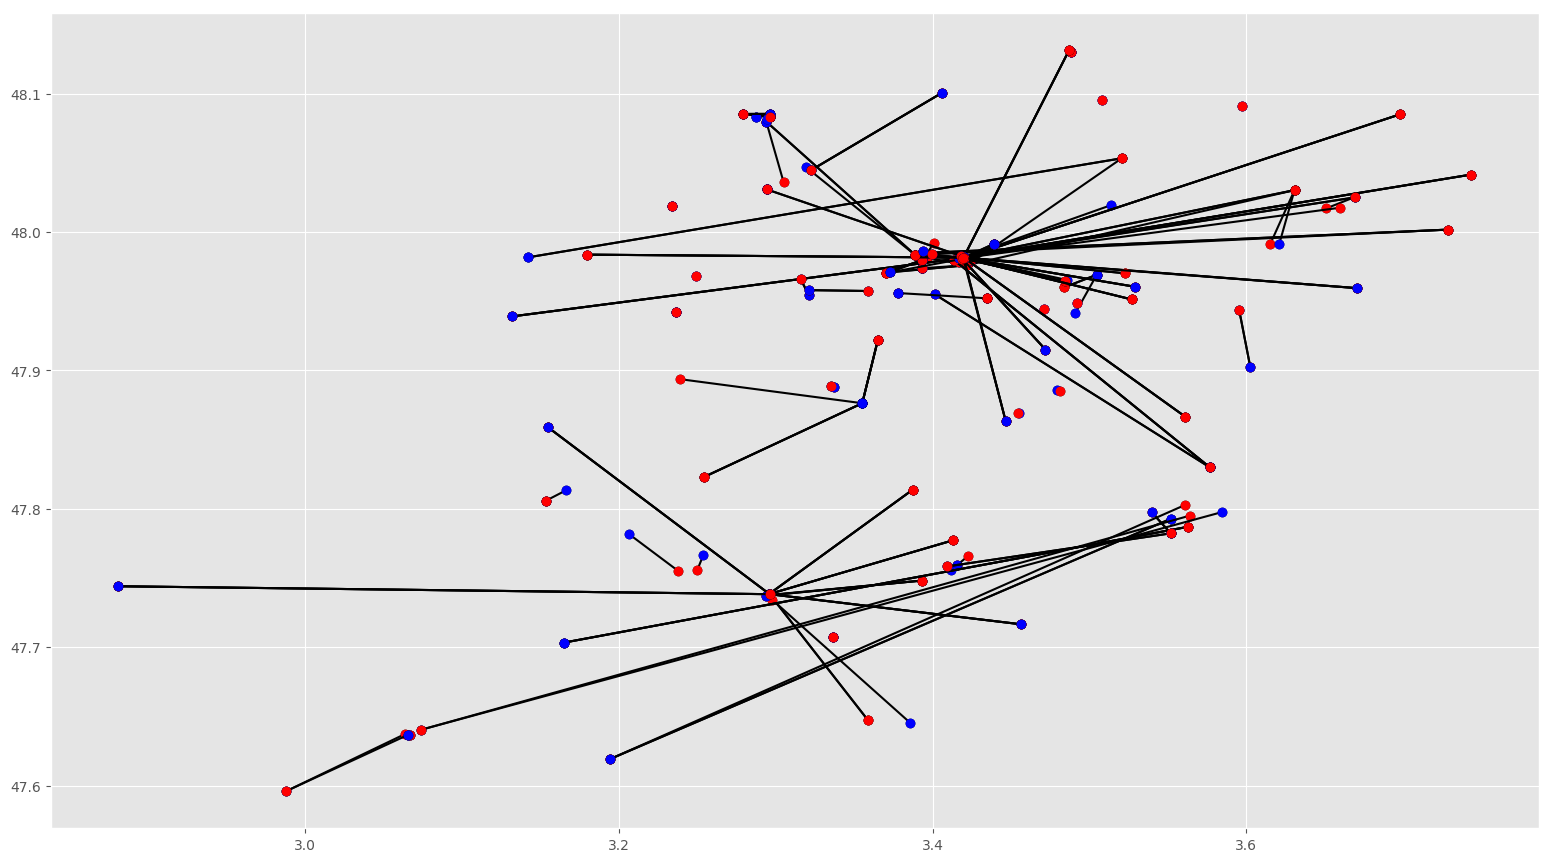

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(19.2, 10.8), dpi=100, sharex=True)
for index, row in df.iterrows():
    # Segment
    ax.plot([row['DEPART_LONGITUDE'], row['FIN_LONGITUDE']], [row['DEPART_LATITUDE'], row['FIN_LATITUDE']], marker='o', color='black')
    
    # Colorize start and end points
    ax.plot(row['DEPART_LONGITUDE'], row['DEPART_LATITUDE'], marker='o', color='b')
    ax.plot(row['FIN_LONGITUDE'], row['FIN_LATITUDE'], marker='o', color='r')

In [3]:
yonne_border = pd.read_csv('data/Yonne_border.csv')

In [35]:
yonne_border.head()

latitude  longitude    way_id
0  48.390182   3.414721  23301782
1  48.387815   3.414386  23301782
2  48.386460   3.414017  23301782
3  48.384782   3.413690  23301782
4  48.381417   3.412985  23301782

In [36]:
yonne_border.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12337 entries, 0 to 12336
Data columns (total 3 columns):
latitude     12337 non-null float64
longitude    12337 non-null float64
way_id       12337 non-null int64
dtypes: float64(2), int64(1)
memory usage: 289.2 KB


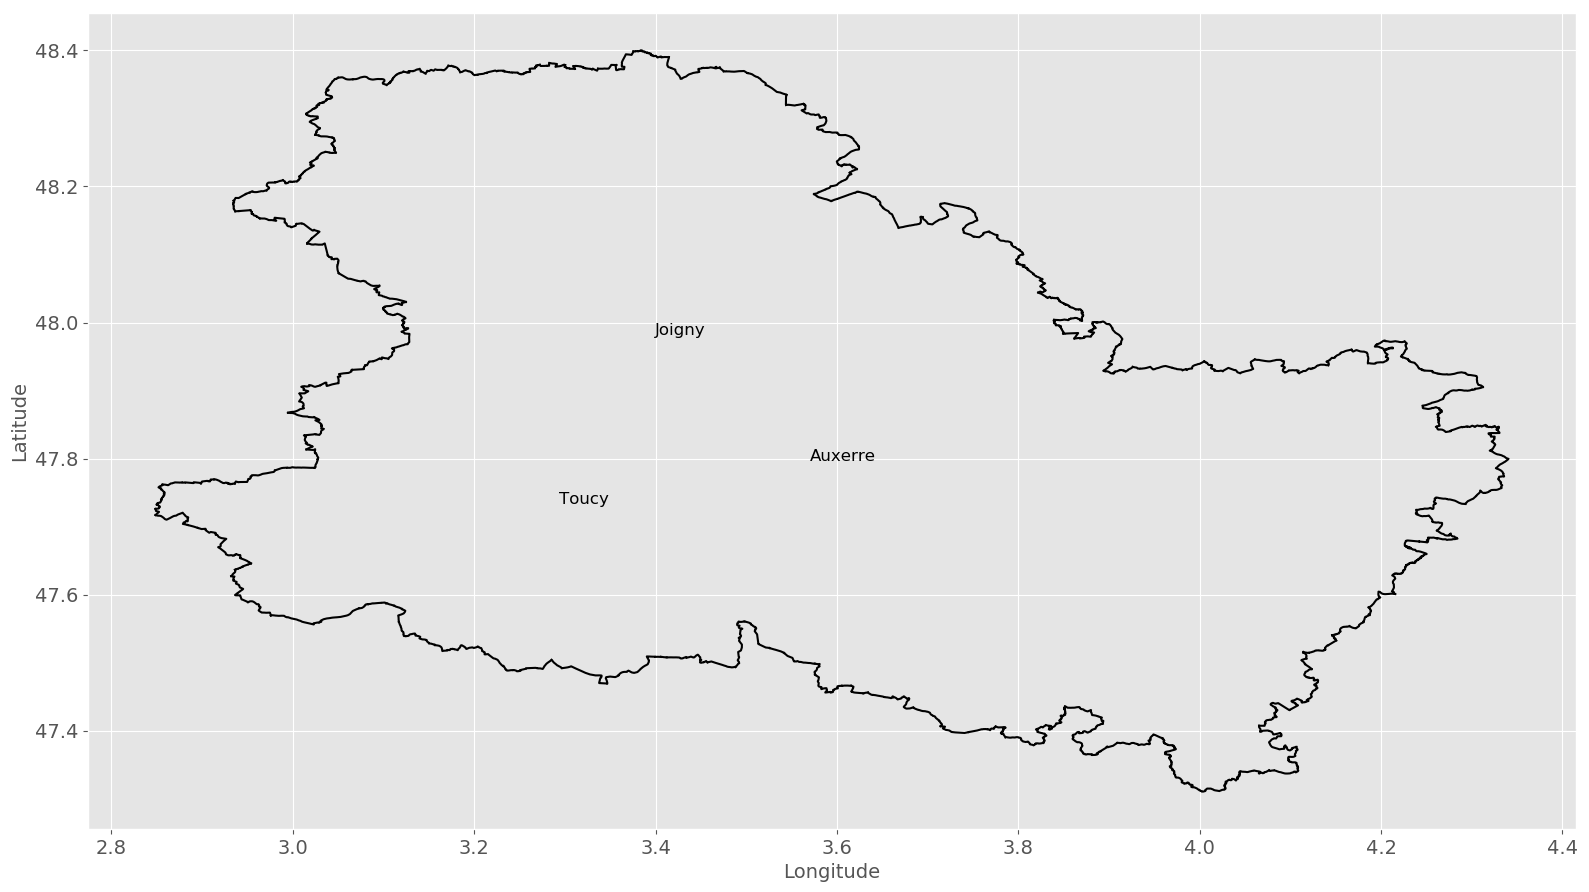

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(19.2, 10.8), dpi=100, sharex=True)
for way_id in yonne_border['way_id'].unique():
    ax.plot(yonne_border.loc[yonne_border['way_id'] == way_id, 'longitude'],
            yonne_border.loc[yonne_border['way_id'] == way_id, 'latitude'], color='black')
ax.text(3.5705790, 47.7961287, 'Auxerre', {'color': 'black'}, fontsize=12)
ax.text(3.3991365, 47.9825085, 'Joigny', {'color': 'black'}, fontsize=12)
ax.text(3.2939186, 47.7338629, 'Toucy', {'color': 'black'}, fontsize=12)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)

### The shape is strange, so we try projections

In [5]:
# https://wiki.openstreetmap.org/wiki/Mercator#C
import math
EARTH_RADIUS = 6378137
def deg2rad(deg):
    return deg * math.pi / 180.0
def lat2y(lat):
    return math.log(math.tan(deg2rad(lat) / 2.0 + math.pi / 4.0)) * EARTH_RADIUS
def lon2x(lon):
    return deg2rad(lon) * EARTH_RADIUS

In [6]:
yonne_border['x'] = yonne_border['longitude'].apply(lon2x)
yonne_border['y'] = yonne_border['latitude'].apply(lat2y)

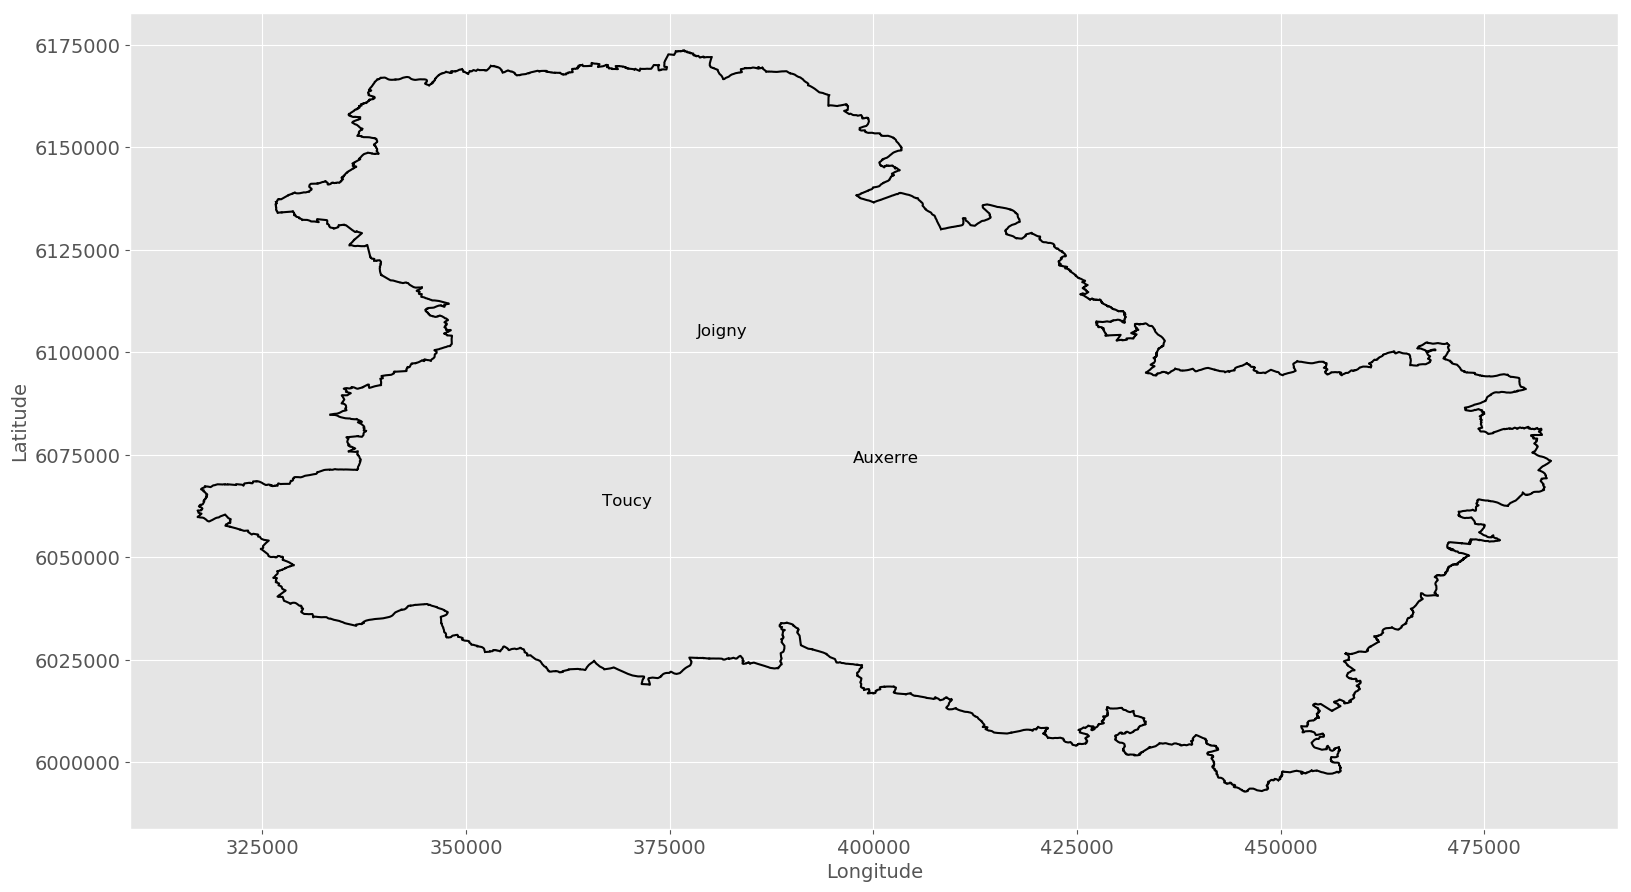

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(19.2, 10.8), dpi=100, sharex=True)
for way_id in yonne_border['way_id'].unique():
    ax.plot(yonne_border.loc[yonne_border['way_id'] == way_id, 'x'],
            yonne_border.loc[yonne_border['way_id'] == way_id, 'y'], color='black')
ax.text(lon2x(3.5705790), lat2y(47.7961287), 'Auxerre', {'color': 'black'}, fontsize=12)
ax.text(lon2x(3.3991365), lat2y(47.9825085), 'Joigny', {'color': 'black'}, fontsize=12)
ax.text(lon2x(3.2939186), lat2y(47.7338629), 'Toucy', {'color': 'black'}, fontsize=12)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)

In [95]:
# https://wiki.openstreetmap.org/wiki/Mercator#Python_implementation
import math

def merc_x(lon):
    r_major=6378137.000
    return r_major*math.radians(lon)

def merc_y(lat):
    if lat>89.5:lat=89.5
    if lat<-89.5:lat=-89.5
    r_major=6378137.000
    r_minor=6356752.3142
    temp=r_minor/r_major
    eccent=math.sqrt(1-temp**2)
    phi=math.radians(lat)
    sinphi=math.sin(phi)
    con=eccent*sinphi
    com=eccent/2
    con=((1.0-con)/(1.0+con))**com
    ts=math.tan((math.pi/2-phi)/2)/con
    y=0-r_major*math.log(ts)
    return y

In [96]:
yonne_border['merc_x'] = yonne_border['longitude'].apply(merc_x)
yonne_border['merc_y'] = yonne_border['latitude'].apply(merc_y)

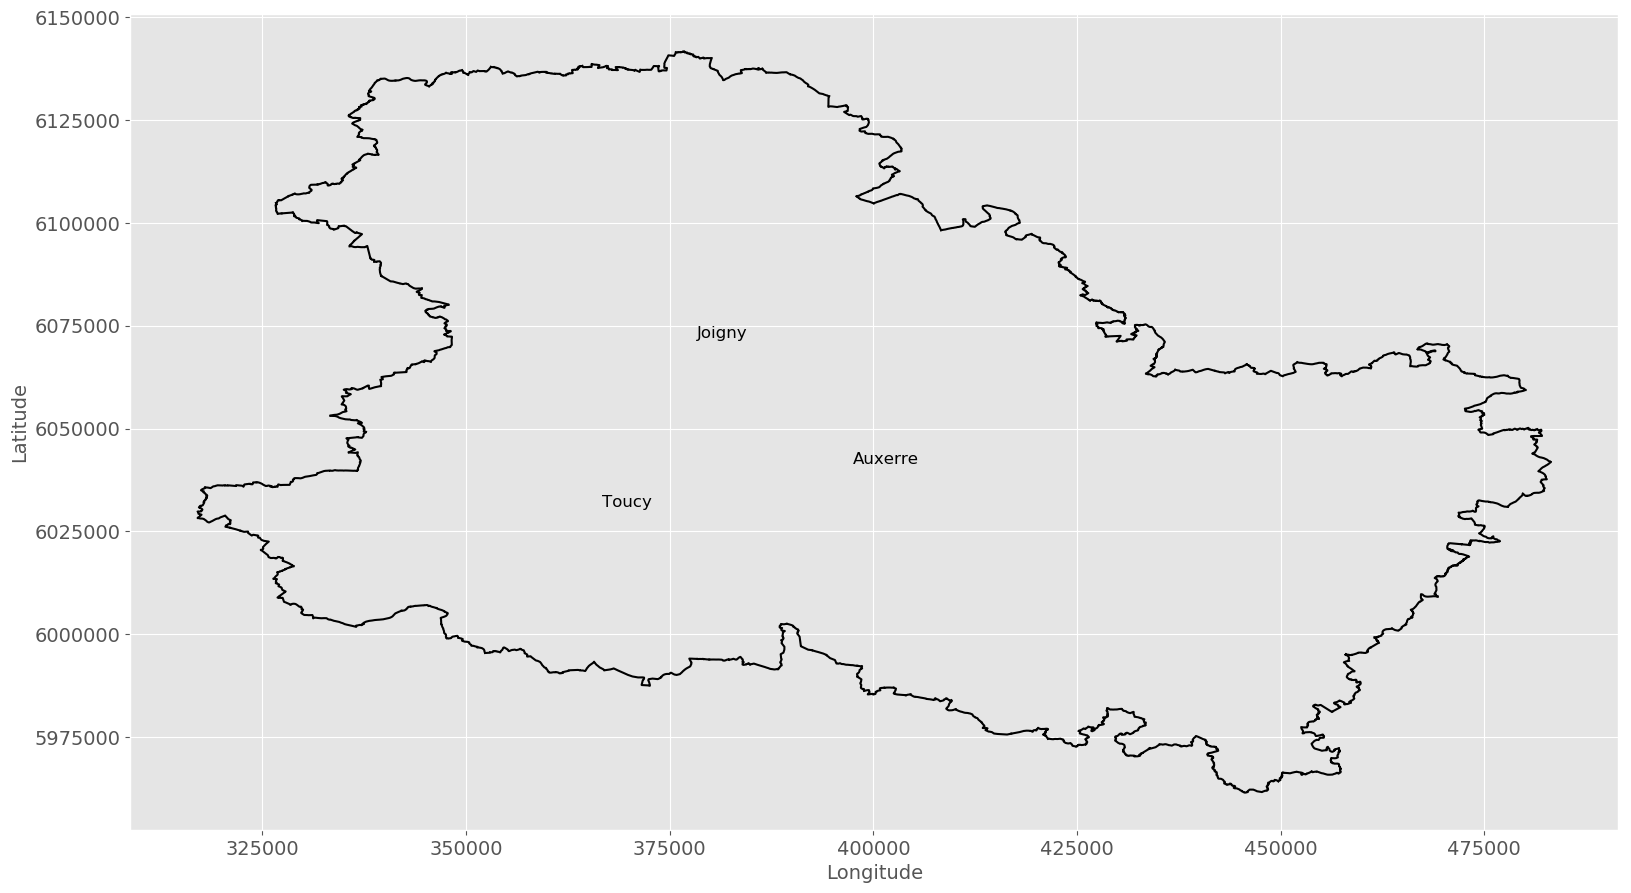

In [100]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(19.2, 10.8), dpi=100, sharex=True)
for way_id in yonne_border['way_id'].unique():
    ax.plot(yonne_border.loc[yonne_border['way_id'] == way_id, 'merc_x'],
            yonne_border.loc[yonne_border['way_id'] == way_id, 'merc_y'], color='black')
ax.text(merc_x(3.5705790), merc_y(47.7961287), 'Auxerre', {'color': 'black'}, fontsize=12)
ax.text(merc_x(3.3991365), merc_y(47.9825085), 'Joigny', {'color': 'black'}, fontsize=12)
ax.text(merc_x(3.2939186), merc_y(47.7338629), 'Toucy', {'color': 'black'}, fontsize=12)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)

### It is not better so we try by changing scales

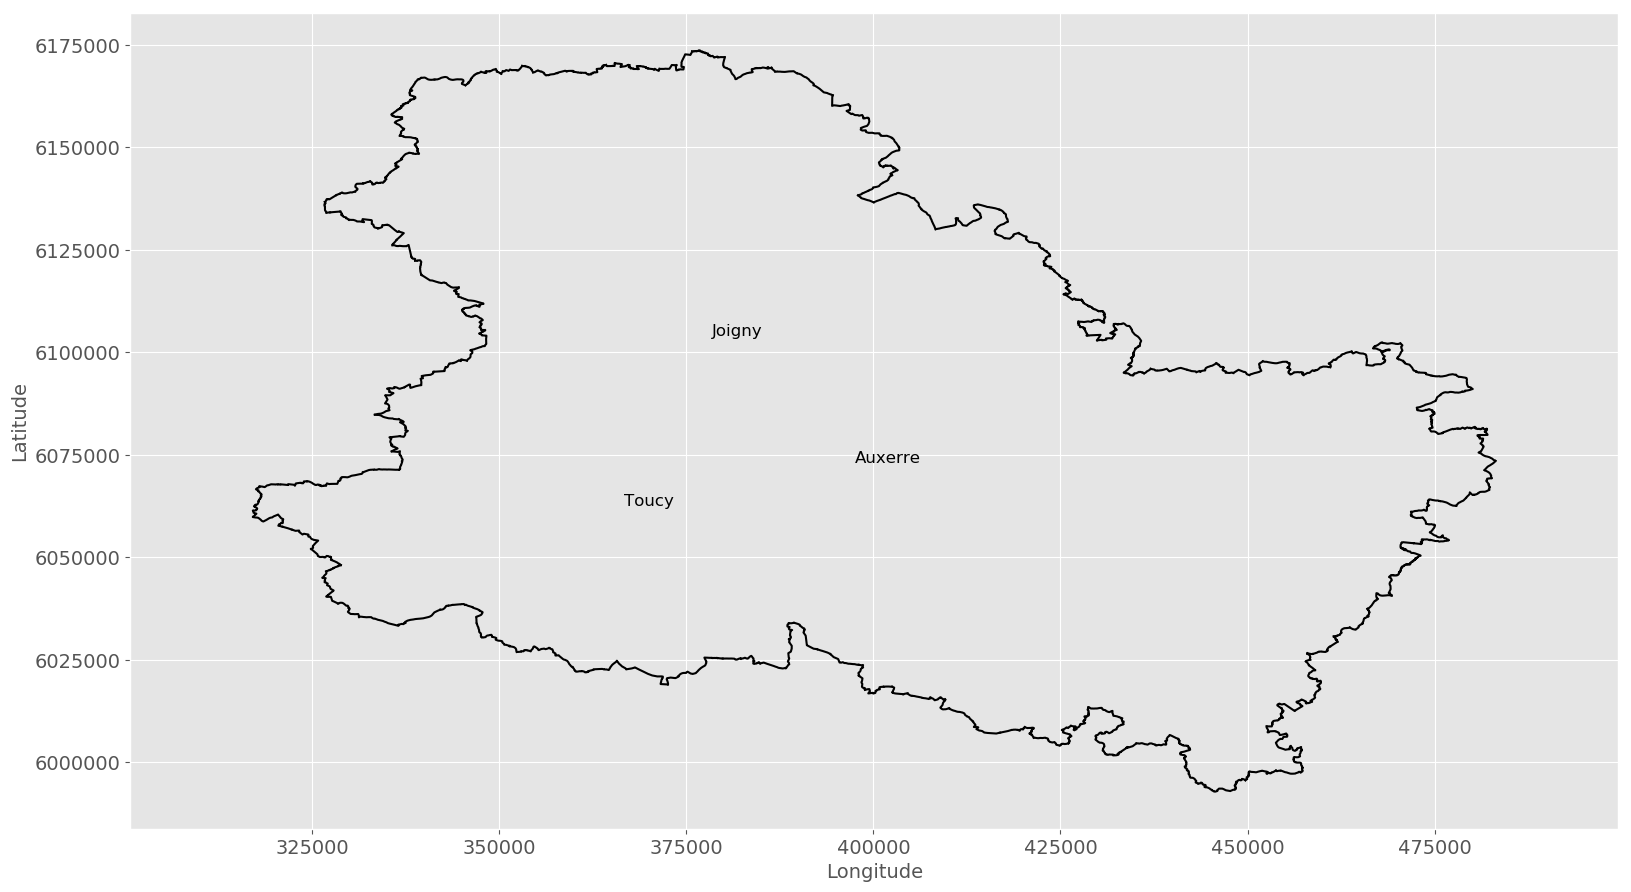

In [98]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(19.2, 10.8), dpi=100, sharex=True)
for way_id in yonne_border['way_id'].unique():
    ax.plot(yonne_border.loc[yonne_border['way_id'] == way_id, 'x'],
            yonne_border.loc[yonne_border['way_id'] == way_id, 'y'], color='black')
ax.text(lon2x(3.5705790), lat2y(47.7961287), 'Auxerre', {'color': 'black'}, fontsize=12)
ax.text(lon2x(3.3991365), lat2y(47.9825085), 'Joigny', {'color': 'black'}, fontsize=12)
ax.text(lon2x(3.2939186), lat2y(47.7338629), 'Toucy', {'color': 'black'}, fontsize=12)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)

# Same scale in both axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xscale = xlim[1] - xlim[0]
yscale = ylim[1] - ylim[0]
if xscale > yscale:
    ax.set_ylim([ylim[0] - (xscale - yscale)/2, ylim[1] + (xscale - yscale)/2])
else:
    ax.set_xlim([xlim[0] - (yscale - xscale)/2, xlim[1] + (yscale - xscale)/2])

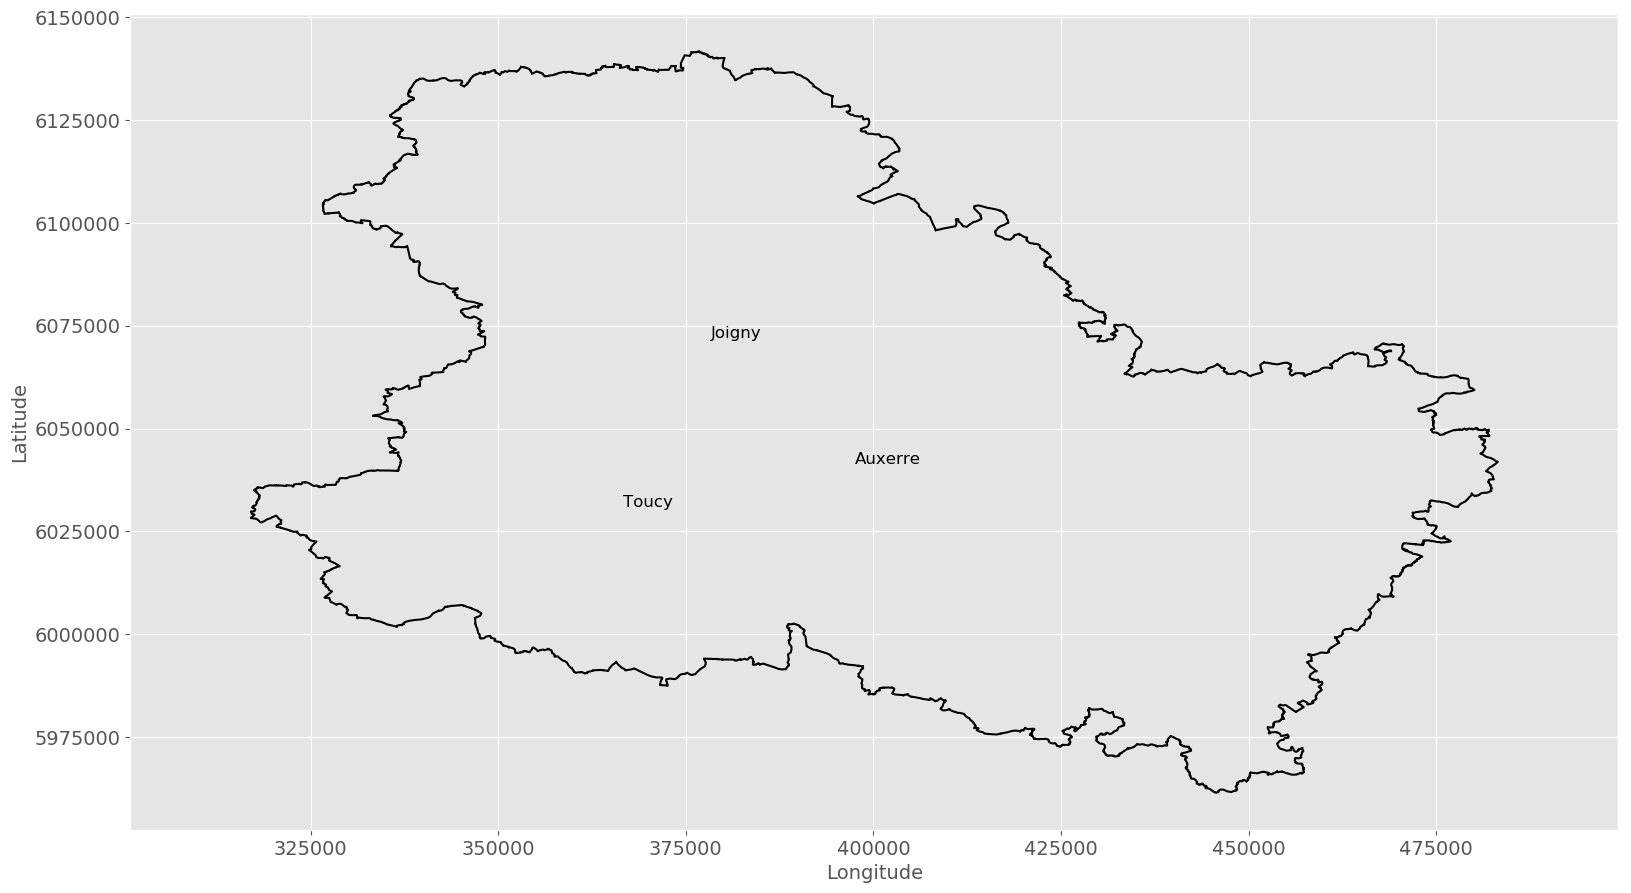

In [101]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(19.2, 10.8), dpi=100, sharex=True)
for way_id in yonne_border['way_id'].unique():
    ax.plot(yonne_border.loc[yonne_border['way_id'] == way_id, 'merc_x'],
            yonne_border.loc[yonne_border['way_id'] == way_id, 'merc_y'], color='black')
ax.text(merc_x(3.5705790), merc_y(47.7961287), 'Auxerre', {'color': 'black'}, fontsize=12)
ax.text(merc_x(3.3991365), merc_y(47.9825085), 'Joigny', {'color': 'black'}, fontsize=12)
ax.text(merc_x(3.2939186), merc_y(47.7338629), 'Toucy', {'color': 'black'}, fontsize=12)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)

# Same scale in both axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xscale = xlim[1] - xlim[0]
yscale = ylim[1] - ylim[0]
if xscale > yscale:
    ax.set_ylim([ylim[0] - (xscale - yscale)/2, ylim[1] + (xscale - yscale)/2])
else:
    ax.set_xlim([xlim[0] - (yscale - xscale)/2, xlim[1] + (yscale - xscale)/2])

### Try by changing the figsize

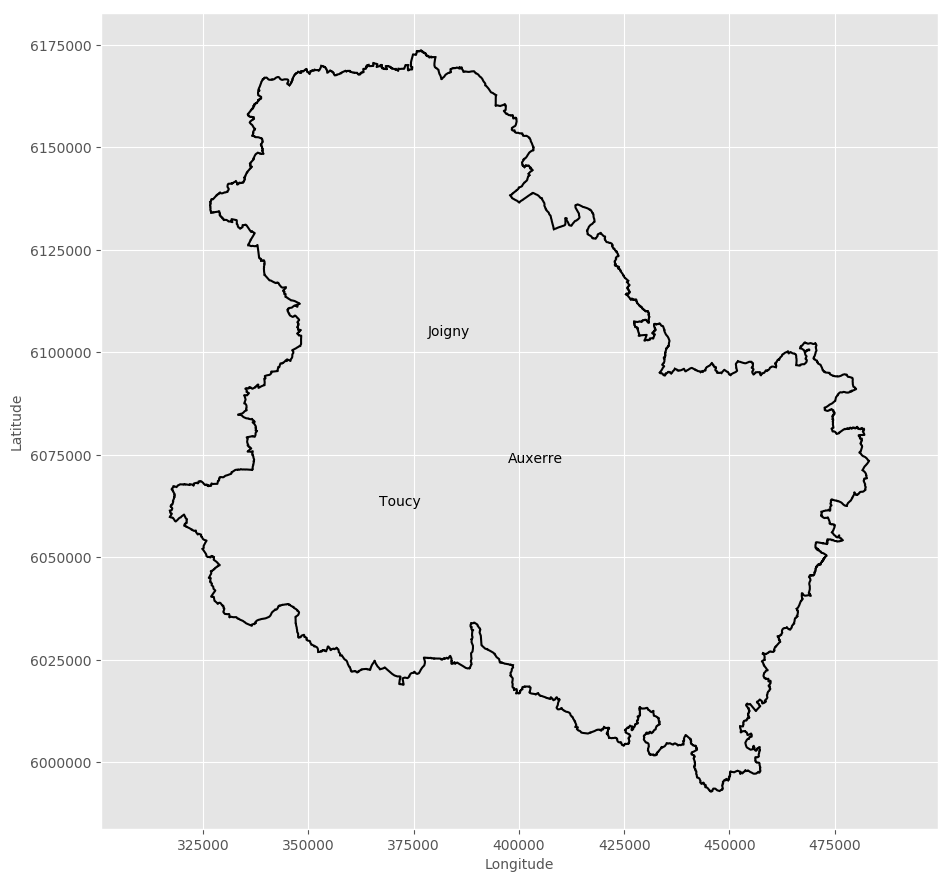

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10.8, 10.8), dpi=100, sharex=True)
for way_id in yonne_border['way_id'].unique():
    ax.plot(yonne_border.loc[yonne_border['way_id'] == way_id, 'x'],
            yonne_border.loc[yonne_border['way_id'] == way_id, 'y'], color='black')
ax.text(lon2x(3.5705790), lat2y(47.7961287), 'Auxerre', {'color': 'black'}, fontsize=10)
ax.text(lon2x(3.3991365), lat2y(47.9825085), 'Joigny', {'color': 'black'}, fontsize=10)
ax.text(lon2x(3.2939186), lat2y(47.7338629), 'Toucy', {'color': 'black'}, fontsize=10)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(10)

# Same scale in both axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xscale = xlim[1] - xlim[0]
yscale = ylim[1] - ylim[0]
if xscale > yscale:
    ax.set_ylim([ylim[0] - (xscale - yscale)/2, ylim[1] + (xscale - yscale)/2])
else:
    ax.set_xlim([xlim[0] - (yscale - xscale)/2, xlim[1] + (yscale - xscale)/2])

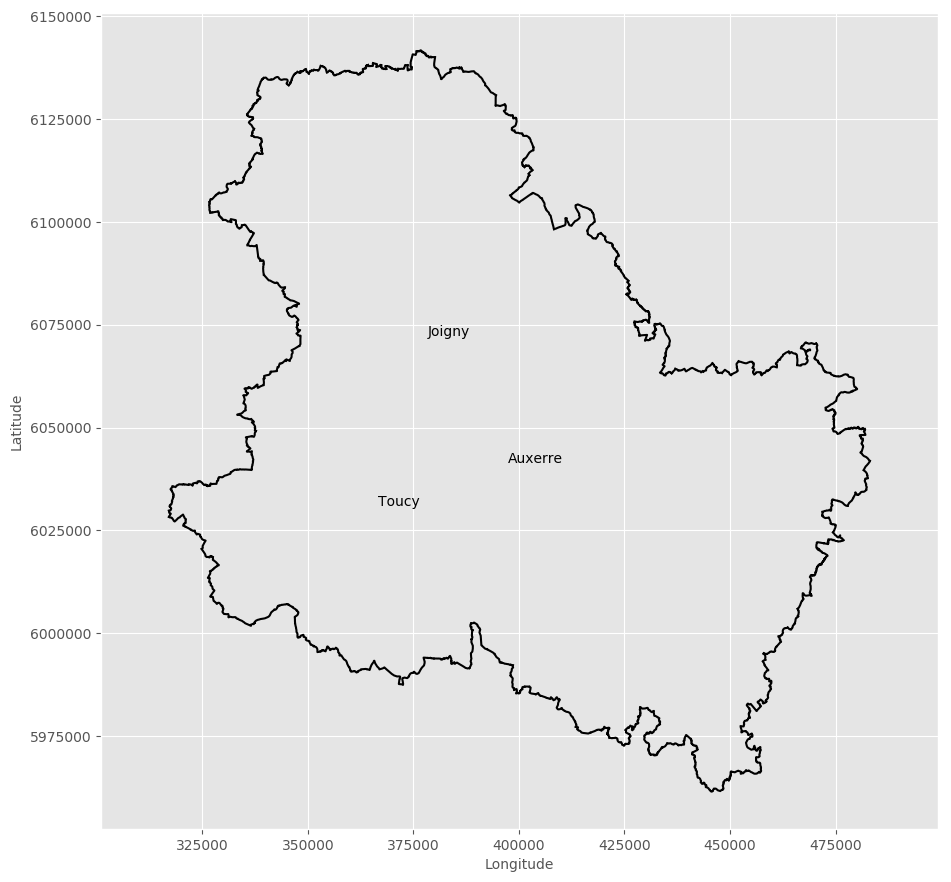

In [103]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10.8, 10.8), dpi=100, sharex=True)
for way_id in yonne_border['way_id'].unique():
    ax.plot(yonne_border.loc[yonne_border['way_id'] == way_id, 'merc_x'],
            yonne_border.loc[yonne_border['way_id'] == way_id, 'merc_y'], color='black')
ax.text(merc_x(3.5705790), merc_y(47.7961287), 'Auxerre', {'color': 'black'}, fontsize=10)
ax.text(merc_x(3.3991365), merc_y(47.9825085), 'Joigny', {'color': 'black'}, fontsize=10)
ax.text(merc_x(3.2939186), merc_y(47.7338629), 'Toucy', {'color': 'black'}, fontsize=10)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(10)

# Same scale in both axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xscale = xlim[1] - xlim[0]
yscale = ylim[1] - ylim[0]
if xscale > yscale:
    ax.set_ylim([ylim[0] - (xscale - yscale)/2, ylim[1] + (xscale - yscale)/2])
else:
    ax.set_xlim([xlim[0] - (yscale - xscale)/2, xlim[1] + (yscale - xscale)/2])

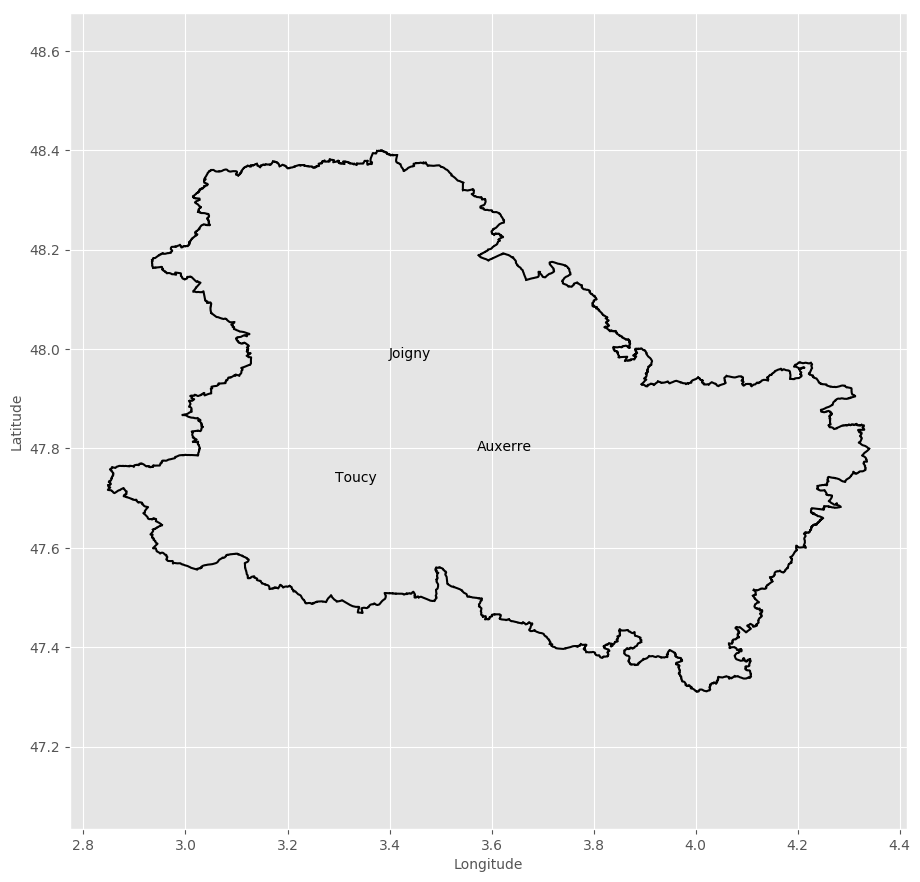

In [105]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10.8, 10.8), dpi=100, sharex=True)
for way_id in yonne_border['way_id'].unique():
    ax.plot(yonne_border.loc[yonne_border['way_id'] == way_id, 'longitude'],
            yonne_border.loc[yonne_border['way_id'] == way_id, 'latitude'], color='black')
ax.text(3.5705790, 47.7961287, 'Auxerre', {'color': 'black'}, fontsize=10)
ax.text(3.3991365, 47.9825085, 'Joigny', {'color': 'black'}, fontsize=10)
ax.text(3.2939186, 47.7338629, 'Toucy', {'color': 'black'}, fontsize=10)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(10)

# Same scale in both axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xscale = xlim[1] - xlim[0]
yscale = ylim[1] - ylim[0]
if xscale > yscale:
    ax.set_ylim([ylim[0] - (xscale - yscale)/2, ylim[1] + (xscale - yscale)/2])
else:
    ax.set_xlim([xlim[0] - (yscale - xscale)/2, xlim[1] + (yscale - xscale)/2])

The projection are equivalent, we keep the sperical one because it is the one used by OSM and it is simpler

### Plot the map with segments

In [106]:
df['DEPART_X'] = df['DEPART_LONGITUDE'].apply(lon2x)
df['DEPART_Y'] = df['DEPART_LATITUDE'].apply(lat2y)

In [107]:
df['FIN_X'] = df['FIN_LONGITUDE'].apply(lon2x)
df['FIN_Y'] = df['FIN_LATITUDE'].apply(lat2y)

(308790.36336544505, 491436.89838551456, 5983841.65939787, 6182709.840729812)

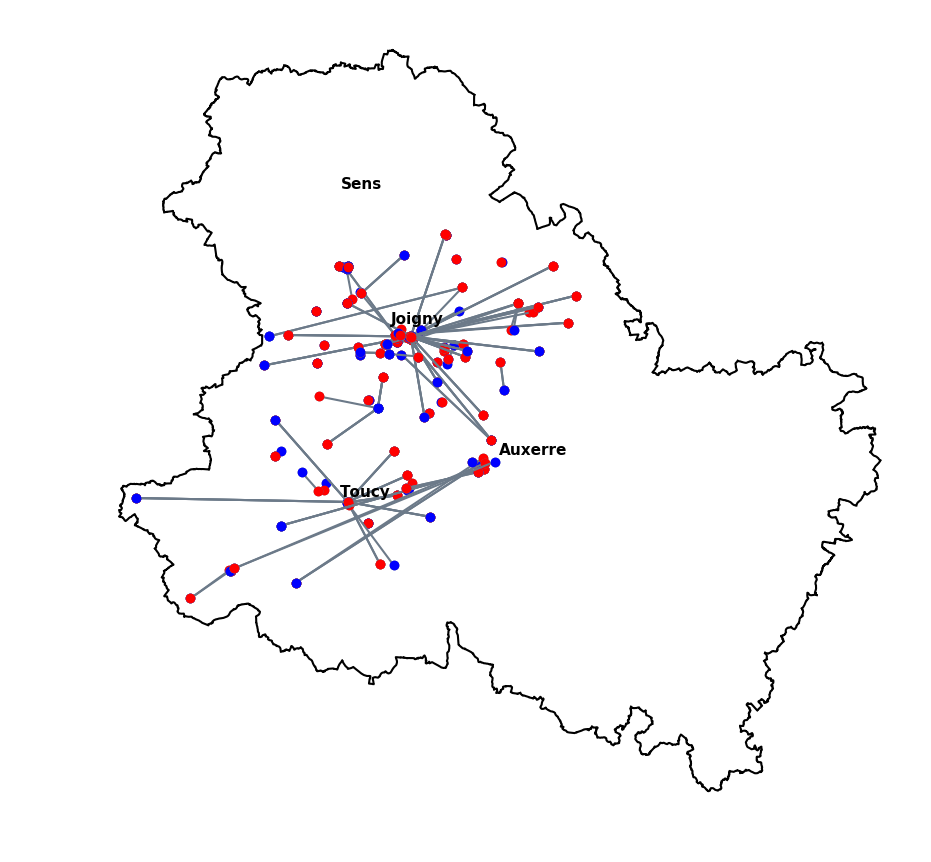

In [129]:
sabine_grey = (108/255., 122/255., 137/255.)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10.8, 10.8), dpi=100, sharex=True)
for way_id in yonne_border['way_id'].unique():
    # Yonne border
    ax.plot(yonne_border.loc[yonne_border['way_id'] == way_id, 'x'],
            yonne_border.loc[yonne_border['way_id'] == way_id, 'y'], color='black')

for index, row in df.iterrows():    
    # Segment
    ax.plot([row['DEPART_X'], row['FIN_X']], [row['DEPART_Y'], row['FIN_Y']], marker='o', color=sabine_grey)
    
    # Colorize start and end points
    ax.plot(row['DEPART_X'], row['DEPART_Y'], marker='o', color='b')
    ax.plot(row['FIN_X'], row['FIN_Y'], marker='o', color='r')
    
# Some cities
ax.text(lon2x(3.5705790) + 2500, lat2y(47.7961287) + 2000, 'Auxerre', {'color': 'black', 'weight': 'bold'}, fontsize=11)
ax.text(lon2x(3.3991365) - 2000, lat2y(47.9825085) + 3000, 'Joigny', {'color': 'black', 'weight': 'bold'}, fontsize=11)
ax.text(lon2x(3.2939186) - 1500, lat2y(47.7338629) + 2000, 'Toucy', {'color': 'black', 'weight': 'bold'}, fontsize=11)
ax.text(lon2x(3.2826060), lat2y(48.1978559), 'Sens', {'color': 'black', 'weight': 'bold'}, fontsize=11)
ax.axis('off')

Text(0.5,1,'Services on Monday')

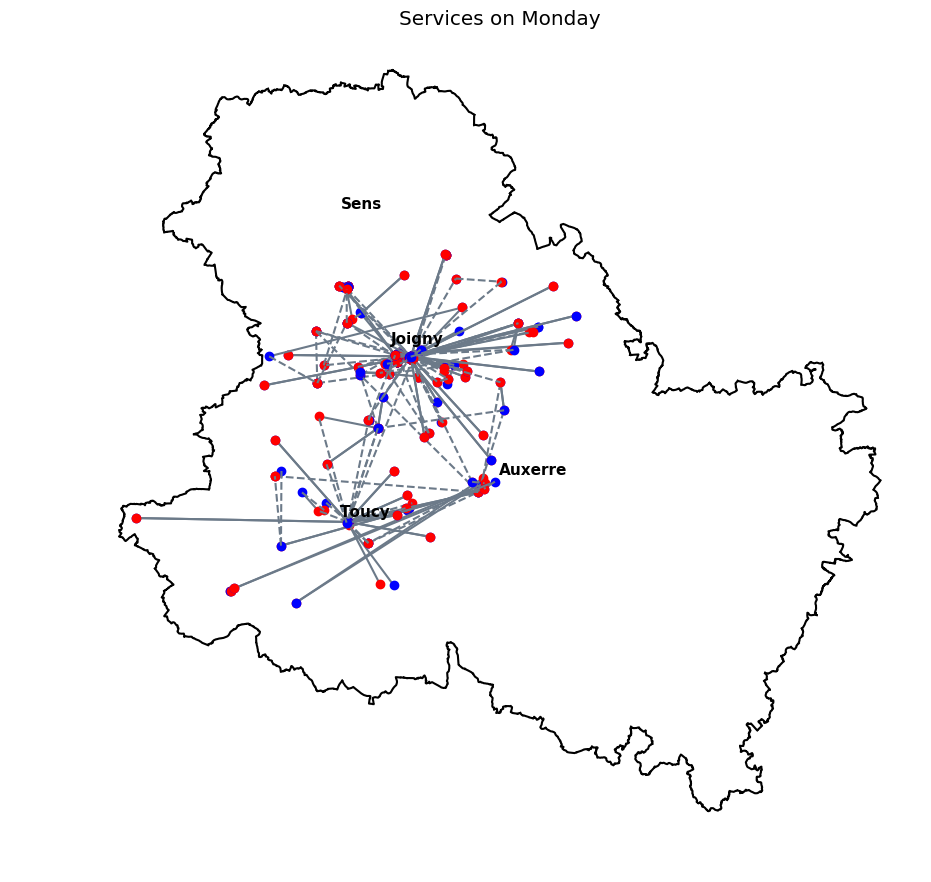

In [152]:
sabine_grey = (108/255., 122/255., 137/255.)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10.8, 10.8), dpi=100, sharex=True)
for way_id in yonne_border['way_id'].unique():
    # Yonne border
    ax.plot(yonne_border.loc[yonne_border['way_id'] == way_id, 'x'],
            yonne_border.loc[yonne_border['way_id'] == way_id, 'y'], color='black')

for service in df['LUNDI'].unique():
    if pd.isnull(service):
        continue
    df2 = df.loc[df['LUNDI'] == service].sort_values('DEPART_HEURE')
    FIN_X = np.nan
    FIN_Y = np.nan
    for index, row in df2.iterrows():
        # Segment
        ax.plot([row['DEPART_X'], row['FIN_X']], [row['DEPART_Y'], row['FIN_Y']], color=sabine_grey)

        # Colorize start and end points
        ax.plot(row['DEPART_X'], row['DEPART_Y'], marker='o', color='b')
        ax.plot(row['FIN_X'], row['FIN_Y'], marker='o', color='r')

        # Link between segments
        if not np.isnan(FIN_X):
            ax.plot([row['DEPART_X'], FIN_X], [row['DEPART_Y'], FIN_Y], '--', color=sabine_grey)
        FIN_X = row['FIN_X']
        FIN_Y = row['FIN_Y']
    
# Some cities
ax.text(lon2x(3.5705790) + 2500, lat2y(47.7961287) + 2000, 'Auxerre', {'color': 'black', 'weight': 'bold'}, fontsize=11)
ax.text(lon2x(3.3991365) - 2000, lat2y(47.9825085) + 3000, 'Joigny', {'color': 'black', 'weight': 'bold'}, fontsize=11)
ax.text(lon2x(3.2939186) - 1500, lat2y(47.7338629) + 2000, 'Toucy', {'color': 'black', 'weight': 'bold'}, fontsize=11)
ax.text(lon2x(3.2826060), lat2y(48.1978559), 'Sens', {'color': 'black', 'weight': 'bold'}, fontsize=11)
ax.axis('off')
ax.set_title('Services on Monday')

Text(0.5,1,'Services on Wednesday')

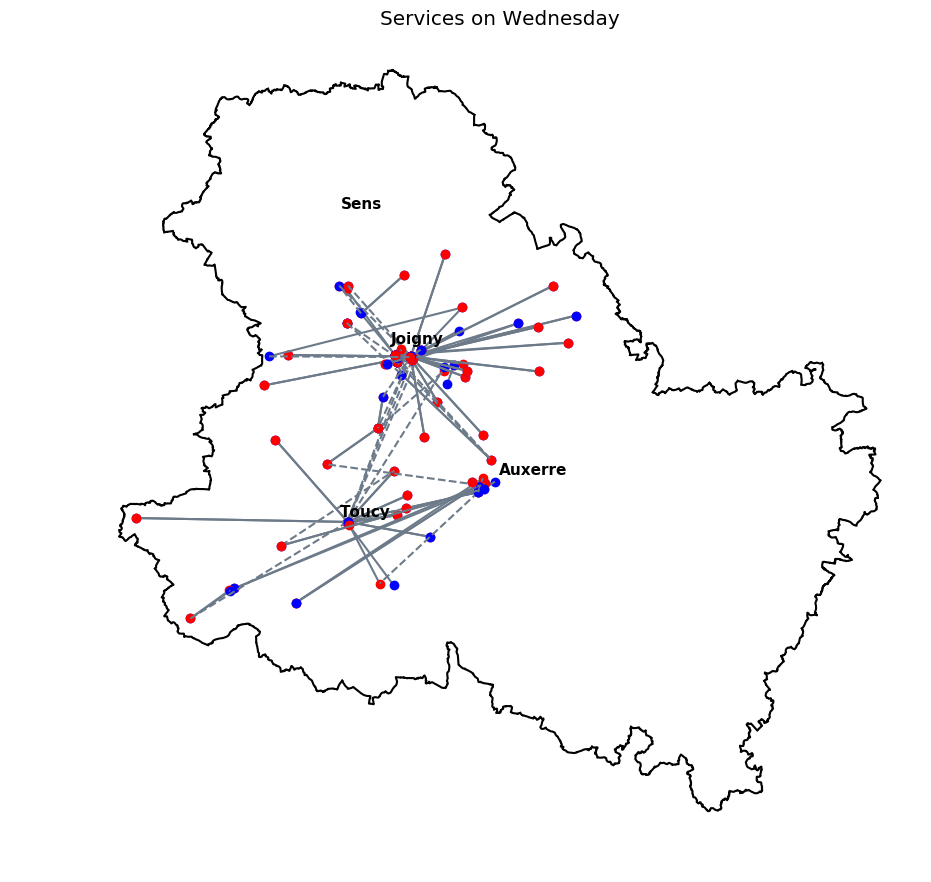

In [154]:
sabine_grey = (108/255., 122/255., 137/255.)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10.8, 10.8), dpi=100, sharex=True)
for way_id in yonne_border['way_id'].unique():
    # Yonne border
    ax.plot(yonne_border.loc[yonne_border['way_id'] == way_id, 'x'],
            yonne_border.loc[yonne_border['way_id'] == way_id, 'y'], color='black')

for service in df['MERCREDI'].unique():
    if pd.isnull(service):
        continue
    df2 = df.loc[df['MERCREDI'] == service].sort_values('DEPART_HEURE')
    FIN_X = np.nan
    FIN_Y = np.nan
    for index, row in df2.iterrows():
        # Segment
        ax.plot([row['DEPART_X'], row['FIN_X']], [row['DEPART_Y'], row['FIN_Y']], color=sabine_grey)

        # Colorize start and end points
        ax.plot(row['DEPART_X'], row['DEPART_Y'], marker='o', color='b')
        ax.plot(row['FIN_X'], row['FIN_Y'], marker='o', color='r')

        # Link between segments
        if not np.isnan(FIN_X):
            ax.plot([row['DEPART_X'], FIN_X], [row['DEPART_Y'], FIN_Y], '--', color=sabine_grey)
        FIN_X = row['FIN_X']
        FIN_Y = row['FIN_Y']
    
# Some cities
ax.text(lon2x(3.5705790) + 2500, lat2y(47.7961287) + 2000, 'Auxerre', {'color': 'black', 'weight': 'bold'}, fontsize=11)
ax.text(lon2x(3.3991365) - 2000, lat2y(47.9825085) + 3000, 'Joigny', {'color': 'black', 'weight': 'bold'}, fontsize=11)
ax.text(lon2x(3.2939186) - 1500, lat2y(47.7338629) + 2000, 'Toucy', {'color': 'black', 'weight': 'bold'}, fontsize=11)
ax.text(lon2x(3.2826060), lat2y(48.1978559), 'Sens', {'color': 'black', 'weight': 'bold'}, fontsize=11)
ax.axis('off')
ax.set_title('Services on Wednesday')

### Merge with K factor

In [5]:
services = pd.read_csv('data/facteurc_services.csv', sep=';')

In [6]:
services.head()

SER_NOM        SER_LIBELLE  CONDUCTEUR  \
0  BALIAN 09    HASSANE Patrick      CAMEAU   
1  BALIAN 10       THURNE Roger     CABELLO   
2  BALIAN 02    DUVAL Françoise      DUVALF   
3  JOIGNY 13    DE ABREU Gérard     DEABREU   
4  JOIGNY 16  DESCHAMPS Bernard  DESCHAMPSB   

                                          COND_DEPOT LIE_LATITUDE  \
0  TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...     47,72012   
1  TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...     47,72012   
2  TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...     47,72012   
3         JOIGNY(89) - DEPOT - 21 RUE VALENTIN PRIVE     47,97713   
4  LA CELLE SAINT CYR(89) - DEPOT - ROUTE DE PINELLE     47,97321   

  LIE_LONGITUDE  VEHICULE_NUMPARC  VEHICULE_CAPACITE  
0        3,3144               7.0               55.0  
1        3,3144               8.0               59.0  
2        3,3144             634.0               33.0  
3       3,38819             585.0               22.0  
4        3,2869             599.0               33.0

In [7]:
services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
SER_NOM              34 non-null object
SER_LIBELLE          34 non-null object
CONDUCTEUR           28 non-null object
COND_DEPOT           25 non-null object
LIE_LATITUDE         25 non-null object
LIE_LONGITUDE        25 non-null object
VEHICULE_NUMPARC     28 non-null float64
VEHICULE_CAPACITE    28 non-null float64
dtypes: float64(2), object(6)
memory usage: 2.2+ KB


In [15]:
services['CONDUCTEUR']

0         CAMEAU
1        CABELLO
2         DUVALF
3        DEABREU
4     DESCHAMPSB
5        ETERNOT
6      FAUVIOT M
7        GAUTIER
8         HOVINE
9         MANCEL
10         MORET
11    BERTHELARD
12       HASSANE
13    ENNABOULSI
14     JACQUINOT
15      FRITSCHN
16      LEONARDO
17      LAURENTG
18         LERAY
19         MACHY
20       FAUVIOT
21    BATTENDIER
22        SADLER
23        BACHIR
24      ALTMAYER
25        BARDIN
26       HOUCHOT
27        MAISON
28           NaN
29           NaN
30           NaN
31           NaN
32           NaN
33           NaN
Name: CONDUCTEUR, dtype: object

In [16]:
servicesC = services[~pd.isnull(services['CONDUCTEUR'])]
servicesC = servicesC[['CONDUCTEUR', 'COND_DEPOT', 'LIE_LATITUDE', 'LIE_LONGITUDE', 'VEHICULE_NUMPARC', 'VEHICULE_CAPACITE']]
servicesC.head()

CONDUCTEUR                                         COND_DEPOT LIE_LATITUDE  \
0      CAMEAU  TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...     47,72012   
1     CABELLO  TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...     47,72012   
2      DUVALF  TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...     47,72012   
3     DEABREU         JOIGNY(89) - DEPOT - 21 RUE VALENTIN PRIVE     47,97713   
4  DESCHAMPSB  LA CELLE SAINT CYR(89) - DEPOT - ROUTE DE PINELLE     47,97321   

  LIE_LONGITUDE  VEHICULE_NUMPARC  VEHICULE_CAPACITE  
0        3,3144               7.0               55.0  
1        3,3144               8.0               59.0  
2        3,3144             634.0               33.0  
3       3,38819             585.0               22.0  
4        3,2869             599.0               33.0

In [17]:
facteurK = pd.read_csv('data/import_2018_11_04_23_30_19_063145.csv', sep=';', encoding='ISO-8859-1')
facteurK = facteurK[facteurK['SECTEUR'] == 'BALIAN']
facteurK = facteurK[['SERVICE', 'CONDUCTEUR', 'DEPOT', 'DEPOT_LAT', 'DEPOT_LON']].drop_duplicates()

In [18]:
facteurK.head()

SERVICE       CONDUCTEUR  \
190  BALIAN 01    BLEIN Jacques   
195  BALIAN 02  DUVAL Françoise   
202  BALIAN 03  MANCEL Isabelle   
207  BALIAN 04     CABELLO Eric   
213  BALIAN 05   BACHIR Patrice   

                                                 DEPOT      DEPOT_LAT  \
190  TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...       47,72012   
195  TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...       47,72012   
202             GRANDCHAMP (89) - DEPOT - RUE GAILLARD  47,8050447028   
207  TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...       47,72012   
213  TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...       47,72012   

        DEPOT_LON  
190        3,3144  
195        3,3144  
202  3,1502708465  
207        3,3144  
213        3,3144

### Create the join key

In [19]:
facteurK['CONDUCTEUR'] = facteurK['CONDUCTEUR'].replace({'FAUVIOT MArcel' : 'FAUVIOTM'})

In [20]:
facteurK['DRIVER_LAST_NAME'] = facteurK['CONDUCTEUR'].apply(lambda s: s.split(' ')[0])

In [21]:
facteurK.head()

SERVICE       CONDUCTEUR  \
190  BALIAN 01    BLEIN Jacques   
195  BALIAN 02  DUVAL Françoise   
202  BALIAN 03  MANCEL Isabelle   
207  BALIAN 04     CABELLO Eric   
213  BALIAN 05   BACHIR Patrice   

                                                 DEPOT      DEPOT_LAT  \
190  TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...       47,72012   
195  TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...       47,72012   
202             GRANDCHAMP (89) - DEPOT - RUE GAILLARD  47,8050447028   
207  TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...       47,72012   
213  TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...       47,72012   

        DEPOT_LON DRIVER_LAST_NAME  
190        3,3144            BLEIN  
195        3,3144            DUVAL  
202  3,1502708465           MANCEL  
207        3,3144          CABELLO  
213        3,3144           BACHIR

In [22]:
facteurK.loc[~facteurK['DRIVER_LAST_NAME'].isin(servicesC['CONDUCTEUR']), 'DRIVER_LAST_NAME']

190        BLEIN
195        DUVAL
218     RIMBAULT
227      GALLOIS
242       THURNE
260      LAURENT
280      FRITSCH
286     FAUVIOTM
316           DE
323       RABEUF
333    DESCHAMPS
363     MISSAULT
Name: DRIVER_LAST_NAME, dtype: object

In [23]:
servicesC['CONDUCTEUR'].sort_values()

24      ALTMAYER
23        BACHIR
25        BARDIN
21    BATTENDIER
11    BERTHELARD
1        CABELLO
0         CAMEAU
3        DEABREU
4     DESCHAMPSB
2         DUVALF
13    ENNABOULSI
5        ETERNOT
20       FAUVIOT
6      FAUVIOT M
15      FRITSCHN
7        GAUTIER
12       HASSANE
26       HOUCHOT
8         HOVINE
14     JACQUINOT
17      LAURENTG
16      LEONARDO
18         LERAY
19         MACHY
27        MAISON
9         MANCEL
10         MORET
22        SADLER
Name: CONDUCTEUR, dtype: object

In [24]:
facteurK['DRIVER_LAST_NAME'] = facteurK['DRIVER_LAST_NAME'].replace({
    'DUVAL': 'DUVALF',
    'LAURENT': 'LAURENTG',
    'FRITSCH' : 'FRITSCHN',
    'DE': 'DEABREU',
    'DESCHAMPS': 'DESCHAMPSB',
    'FAUVIOTM': 'FAUVIOT M'
})

In [25]:
facteurK.loc[~facteurK['DRIVER_LAST_NAME'].isin(servicesC['CONDUCTEUR']), 'DRIVER_LAST_NAME']

190       BLEIN
218    RIMBAULT
227     GALLOIS
242      THURNE
323      RABEUF
363    MISSAULT
Name: DRIVER_LAST_NAME, dtype: object

### Merge Services C with K factor service and depot

In [122]:
merge_df = pd.merge(facteurK, servicesC, left_on='DRIVER_LAST_NAME', right_on='CONDUCTEUR', how='left')

In [123]:
merge_df.head()

SERVICE     CONDUCTEUR_x  \
0  BALIAN 01    BLEIN Jacques   
1  BALIAN 02  DUVAL Françoise   
2  BALIAN 03  MANCEL Isabelle   
3  BALIAN 04     CABELLO Eric   
4  BALIAN 05   BACHIR Patrice   

                                               DEPOT      DEPOT_LAT  \
0  TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...       47,72012   
1  TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...       47,72012   
2             GRANDCHAMP (89) - DEPOT - RUE GAILLARD  47,8050447028   
3  TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...       47,72012   
4  TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...       47,72012   

      DEPOT_LON DRIVER_LAST_NAME CONDUCTEUR_y  \
0        3,3144            BLEIN          NaN   
1        3,3144           DUVALF       DUVALF   
2  3,1502708465           MANCEL       MANCEL   
3        3,3144          CABELLO      CABELLO   
4        3,3144           BACHIR       BACHIR   

                                          COND_DEPOT LIE_LATITUDE  \
0                                                NaN          NaN   
1  TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...     47,72012   
2              GRANDCHAMP(89) - DEPOT - RUE GAILLARD     47,80516   
3  TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...     47,72012   
4                            Y (80) - DEPOT OBSOLÈTE     49,80296   

  LIE_LONGITUDE  VEHICULE_NUMPARC  VEHICULE_CAPACITE  
0           NaN               NaN                NaN  
1        3,3144             634.0               33.0  
2       3,15307             566.0               47.0  
3        3,3144               8.0               59.0  
4       2,99022               9.0               57.0

### Inspect differences

In [124]:
merge_df2 = merge_df[~pd.isnull(merge_df['COND_DEPOT'])]
merge_df2.loc[merge_df2['DEPOT'] != merge_df2['COND_DEPOT'], ['SERVICE', 'DEPOT', 'DEPOT_LAT', 'DEPOT_LON', 'COND_DEPOT', 'LIE_LATITUDE', 'LIE_LONGITUDE']]

SERVICE                                              DEPOT  \
2   BALIAN 03             GRANDCHAMP (89) - DEPOT - RUE GAILLARD   
4   BALIAN 05  TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...   
5   BALIAN 05         POURRAIN (89) - DEPOT - 17 ROUTE IMPERIALE   
13  JOIGNY 01  VILLENEUVE SUR YONNE (89) - DEPOT - RUE DE COL...   
15  JOIGNY 03           AUXERRE (89) - DEPOT - RUE DES MIGRAINES   
19  JOIGNY 07  VILLEVALLIER (89) - DEPOT - 7 RUE DE LA REPUBL...   
22  JOIGNY 09        SAINT MARTIN D'ORDON (89) - DEPOT - ROCHERS   
23  JOIGNY 10              SENS (89) - DEPOT - RUE CHAMPBERTRAND   
25  JOIGNY 12  SAINT MARTIN SUR OUANNE (89) - DEPOT - ROUTE D...   
26  JOIGNY 13        JOIGNY (89) - DEPOT - 21 RUE VALENTIN PRIVE   
28  JOIGNY 15                    CERISIERS (89) - DEPOT - MAIRIE   
29  JOIGNY 16  LA CELLE SAINT CYR (89) - DEPOT - ROUTE DE PIN...   
33  JOIGNY 20                  PAROY EN OTHE (89) - DEPOT - D179   

           DEPOT_LAT         DEPOT_LON  \
2      47,8050447028      3,1502708465   
4           47,72012            3,3144   
5            47,7556           3,41601   
13          48,08065           3,28378   
15          47,80281           3,56112   
19          48,02405           3,31429   
22     48,0291829803      3,2001421504   
23  48,1906033858099  3,27476694993543   
25          47,84042           3,10471   
26     47,9771587286      3,3881685423   
28         48,131812          3,487381   
29          47,97178           3,28605   
33          48,03297           3,57565   

                                           COND_DEPOT     LIE_LATITUDE  \
2               GRANDCHAMP(89) - DEPOT - RUE GAILLARD         47,80516   
4                             Y (80) - DEPOT OBSOLÈTE         49,80296   
5                             Y (80) - DEPOT OBSOLÈTE         49,80296   
13  VILLENEUVE SUR YONNE(89) - DEPOT - RUE DE COLL...         48,08065   
15                 AUXERRE (89) - DEPOT - 4 RUE MONGE         47,80809   
19  VILLEVALLIER(89) - DEPOT - 7 RUE DE LA REPUBLIQUE         48,02405   
22  SAINT MARTIN D'ESTREAUX (42) - DEPOT -  LA CRO...  46,196919410488   
23               SENS(89) - DEPOT - RUE CHAMPBERTRAND          48,1906   
25  SAINT MARTIN SUR OUANNE(89) - DEPOT - ROUTE DE...         47,84036   
26         JOIGNY(89) - DEPOT - 21 RUE VALENTIN PRIVE         47,97713   
28                   PARON (89) - DEPOT - 3 RUE VERTE         48,17737   
29  LA CELLE SAINT CYR(89) - DEPOT - ROUTE DE PINELLE         47,97321   
33                   PAROY EN OTHE(89) - DEPOT - D179         48,03297   

       LIE_LONGITUDE  
2            3,15307  
4            2,99022  
5            2,99022  
13           3,28378  
15           3,56387  
19           3,31429  
22  3,80182166137696  
23           3,27478  
25           3,10553  
26           3,38819  
28           3,23979  
29            3,2869  
33           3,57565

The depot of the "graphicage" is the one of K factor

### Fill and export merge

In [127]:
final_merge_df = merge_df.loc[:,['SERVICE', 'CONDUCTEUR_x', 'DEPOT', 'DEPOT_LAT', 'DEPOT_LON', 'VEHICULE_NUMPARC', 'VEHICULE_CAPACITE']]

In [128]:
final_merge_df[pd.isnull(final_merge_df['VEHICULE_CAPACITE'])]

SERVICE        CONDUCTEUR_x  \
0   BALIAN 01       BLEIN Jacques   
6   BALIAN 06  RIMBAULT Jean Yves   
8   BALIAN 08    GALLOIS Brigitte   
10  BALIAN 10        THURNE Roger   
27  JOIGNY 14        RABEUF Anais   
35  JOIGNY 22    MISSAULT Francis   

                                                DEPOT         DEPOT_LAT  \
0   TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...          47,72012   
6      TANNERRE EN PUISAYE (89) - DEPOT - LES GATINES  47,7419635488978   
8   TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...          47,72012   
10       PERRIGNY (89) - DEPOT - 1 ALLEE DU TASTE-VIN  47,8303734797973   
27        JOIGNY (89) - DEPOT - 17 ROUTE DE MONTARGIS   47,976977798608   
35        JOIGNY (89) - DEPOT - 17 ROUTE DE MONTARGIS   47,976977798608   

           DEPOT_LON  VEHICULE_NUMPARC  VEHICULE_CAPACITE  
0             3,3144               NaN                NaN  
6   3,17640976702919               NaN                NaN  
8             3,3144               NaN                NaN  
10  3,54467743927256               NaN                NaN  
27   3,3747185925293               NaN                NaN  
35   3,3747185925293               NaN                NaN

In [129]:
final_merge_df.loc[0, 'VEHICULE_NUMPARC'] = 780
final_merge_df.loc[0, 'VEHICULE_CAPACITE'] = 33
final_merge_df.loc[6, 'VEHICULE_NUMPARC'] = 469
final_merge_df.loc[6, 'VEHICULE_CAPACITE'] = 32
final_merge_df.loc[8, 'VEHICULE_NUMPARC'] = 795
final_merge_df.loc[8, 'VEHICULE_CAPACITE'] = 47
final_merge_df.loc[10, 'VEHICULE_NUMPARC'] = 13
final_merge_df.loc[10, 'VEHICULE_CAPACITE'] = 35
final_merge_df.loc[27, 'VEHICULE_NUMPARC'] = 915
final_merge_df.loc[27, 'VEHICULE_CAPACITE'] = 37
final_merge_df.loc[35, 'VEHICULE_NUMPARC'] = 917
final_merge_df.loc[35, 'VEHICULE_CAPACITE'] = 37

In [130]:
pd.isnull(final_merge_df['VEHICULE_CAPACITE']).sum()

0

In [131]:
final_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 7 columns):
SERVICE              36 non-null object
CONDUCTEUR_x         36 non-null object
DEPOT                36 non-null object
DEPOT_LAT            36 non-null object
DEPOT_LON            36 non-null object
VEHICULE_NUMPARC     36 non-null float64
VEHICULE_CAPACITE    36 non-null float64
dtypes: float64(2), object(5)
memory usage: 3.5+ KB


In [132]:
final_merge_df['VEHICULE_NUMPARC'] = final_merge_df['VEHICULE_NUMPARC'].astype(int)
final_merge_df['VEHICULE_CAPACITE'] = final_merge_df['VEHICULE_CAPACITE'].astype(int)

In [133]:
final_merge_df.rename(index=str, columns={'CONDUCTEUR_x' : 'CONDUCTEUR'}, inplace=True)

In [134]:
final_merge_df.to_csv('data/facteurc_services_improved.csv', sep=';', index=False)